<a href="https://colab.research.google.com/github/ManikantaMandlem/Activity-Recognition-using-DNN/blob/main/Mani_Autoencoder_anomaly_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras import layers, losses

In [ ]:
with open('/content/drive/MyDrive/mHealth/project2/ascending stairs.csv', 'r', encoding='utf-8-sig') as f: 
    asc_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/dancing.csv', 'r', encoding='utf-8-sig') as f: 
    dance_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/descending stairs.csv', 'r', encoding='utf-8-sig') as f: 
    des_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/jumping.csv', 'r', encoding='utf-8-sig') as f: 
    jump_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/sitting.csv', 'r', encoding='utf-8-sig') as f: 
    sit_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/standing.csv', 'r', encoding='utf-8-sig') as f: 
    stand_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/walking.csv', 'r', encoding='utf-8-sig') as f: 
    walk_data = np.genfromtxt(f,delimiter = ',')


with open('/content/drive/MyDrive/mHealth/project2/eating.csv', 'r', encoding='utf-8-sig') as f: 
    eat_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/pushups on floor.csv', 'r', encoding='utf-8-sig') as f: 
    pushf_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/pushups against wall.csv', 'r', encoding='utf-8-sig') as f: 
    pushg_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/working on laptop.csv', 'r', encoding='utf-8-sig') as f: 
    laptop_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/running.csv', 'r', encoding='utf-8-sig') as f: 
    run_data = np.genfromtxt(f,delimiter = ',')


In [ ]:
print(asc_data.shape)
print(dance_data.shape)
print(des_data.shape)
print(jump_data.shape)
print(sit_data.shape)
print(stand_data.shape)
print(walk_data.shape)


print(eat_data.shape)
print(pushf_data.shape)
print(pushg_data.shape)
print(laptop_data.shape)
print(run_data.shape)

(14280, 6)
(14280, 6)
(14280, 6)
(14280, 6)
(14280, 6)
(14280, 6)
(14280, 6)
(14280, 6)
(14280, 6)
(14280, 6)
(14280, 6)
(14280, 6)


In [ ]:
def normalize_data(data):
    minimum = np.min(data,axis = 0)
    maximum = np.max(data,axis = 0)
    norm_data = (data - minimum) / (maximum - minimum)
    return norm_data

In [ ]:
asc_data = normalize_data(asc_data)
dance_data = normalize_data(dance_data)
des_data = normalize_data(des_data)
jump_data = normalize_data(jump_data)
sit_data = normalize_data(sit_data)
stand_data = normalize_data(stand_data)
walk_data = normalize_data(walk_data)


eat_data = normalize_data(eat_data)
pushf_data = normalize_data(pushf_data)
pushg_data = normalize_data(pushg_data)
laptop_data = normalize_data(laptop_data)
run_data = normalize_data(run_data)


full_data = np.stack([asc_data,dance_data,des_data,jump_data,sit_data,stand_data,walk_data,eat_data,pushf_data,pushg_data,laptop_data,run_data],axis = 2)
full_data.shape

(14280, 6, 12)

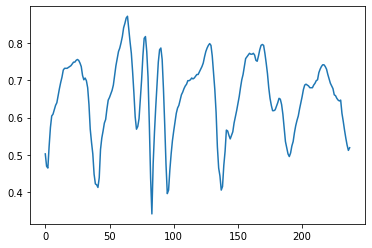

In [ ]:
plt.plot(range(238),run_data[238:238*2,0])
plt.show()

In [ ]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
                                        layers.Dense(128, activation="relu"),
                                        layers.Dense(64, activation="relu"),
                                        layers.Dense(32, activation="relu"),
                                        layers.Dense(16, activation="relu"),
                                        layers.Dense(8, activation="relu")]) # Smallest Layer Defined Here
    
    self.decoder = tf.keras.Sequential([
                                        layers.Dense(16, activation="relu"),
                                        layers.Dense(32, activation="relu"),
                                        layers.Dense(64, activation="relu"),
                                        layers.Dense(128, activation="relu"),
                                        layers.Dense(6, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

model = AnomalyDetector()

In [ ]:
model.compile(optimizer='adam', loss='mae')

testing on:  asc_data
(14280, 6)
Epoch 1/20
151/151 [==============================] - 2s 8ms/step - loss: 0.0756 - val_loss: 0.0493
Epoch 2/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0429 - val_loss: 0.0382
Epoch 3/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0371 - val_loss: 0.0355
Epoch 4/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0355 - val_loss: 0.0335
Epoch 5/20
151/151 [==============================] - 1s 6ms/step - loss: 0.0339 - val_loss: 0.0348
Epoch 6/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0338 - val_loss: 0.0334
Epoch 7/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0321 - val_loss: 0.0304
Epoch 8/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0288 - val_loss: 0.0271
Epoch 9/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0257 - val_loss: 0.0247
Epoch 10/20
151/151 [==============================] - 1s 7ms/step 

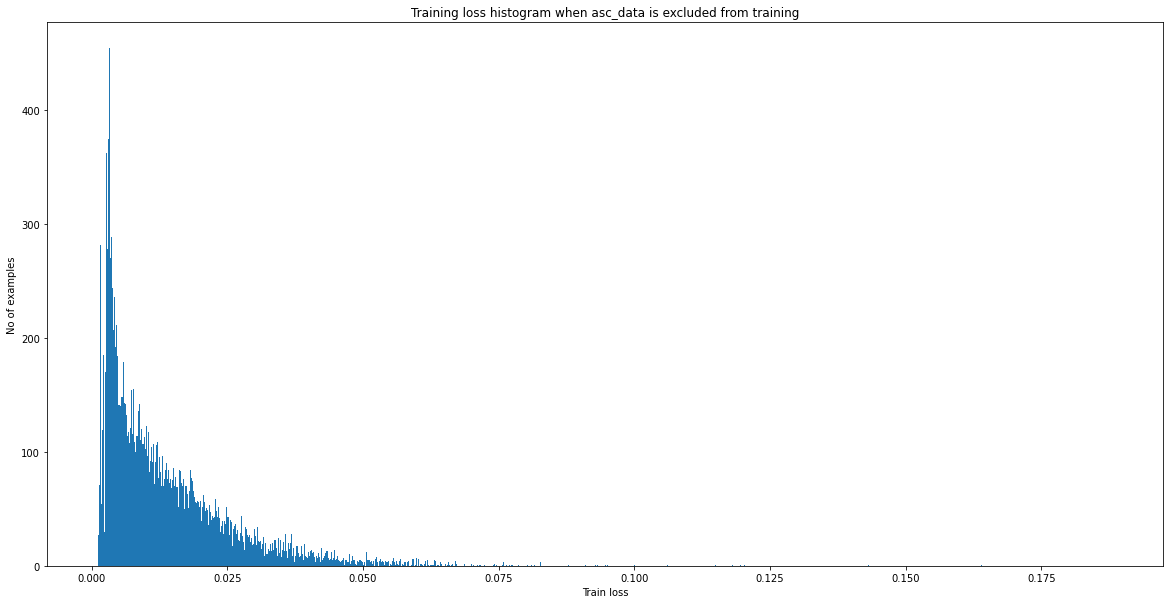

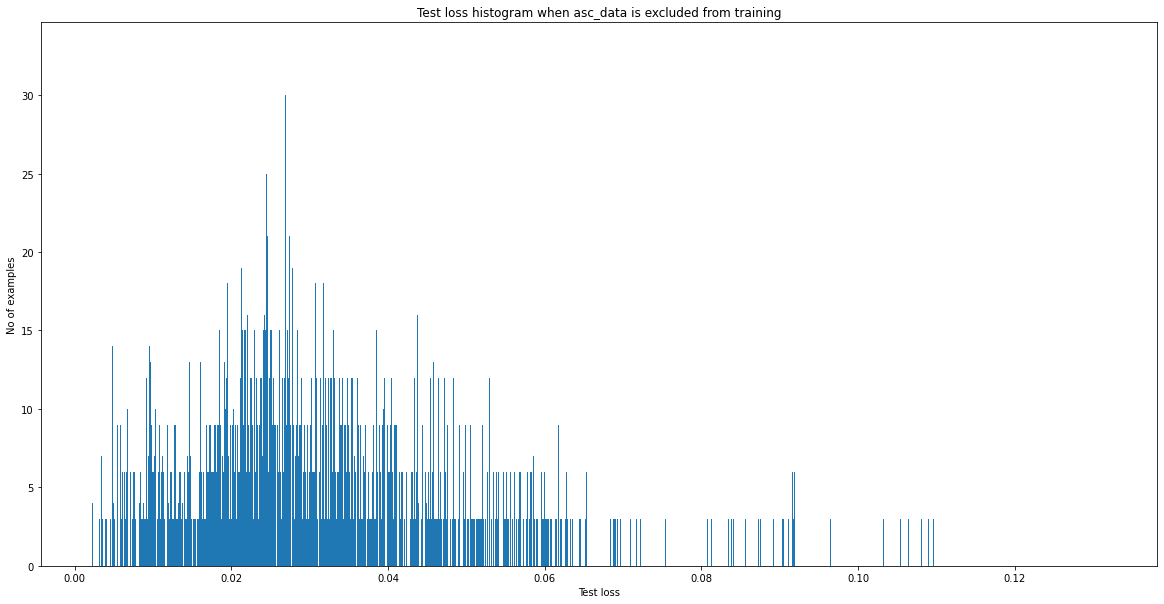

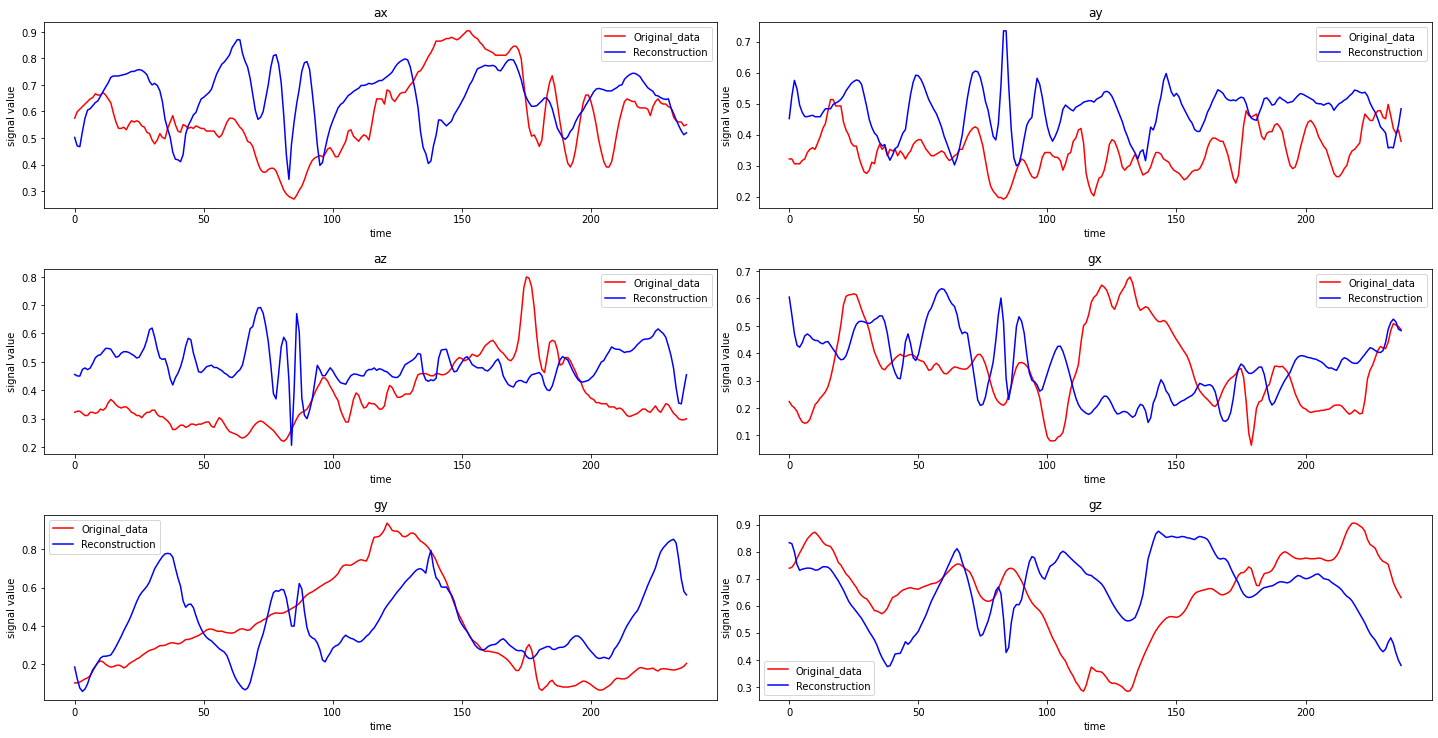

testing on:  dance_data
(14280, 6)
Epoch 1/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0158 - val_loss: 0.0157
Epoch 2/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0147 - val_loss: 0.0132
Epoch 3/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0141 - val_loss: 0.0142
Epoch 4/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0146 - val_loss: 0.0144
Epoch 5/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0132 - val_loss: 0.0125
Epoch 6/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0136 - val_loss: 0.0131
Epoch 7/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0142 - val_loss: 0.0134
Epoch 8/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0135 - val_loss: 0.0144
Epoch 9/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0131 - val_loss: 0.0122
Epoch 10/20
151/151 [==============================] - 1s 7ms/ste

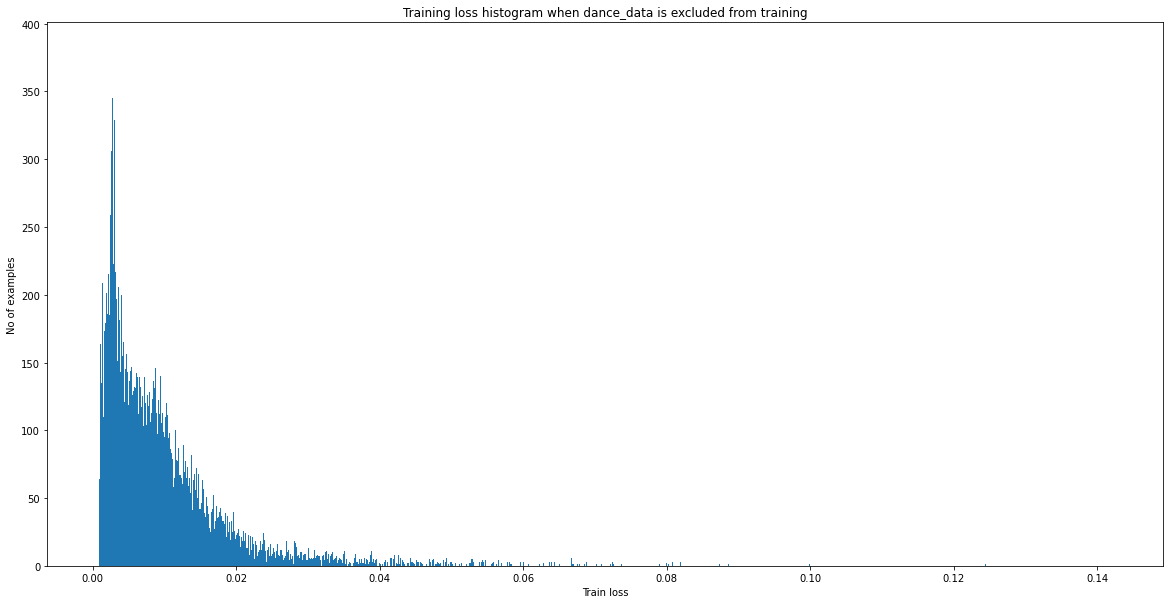

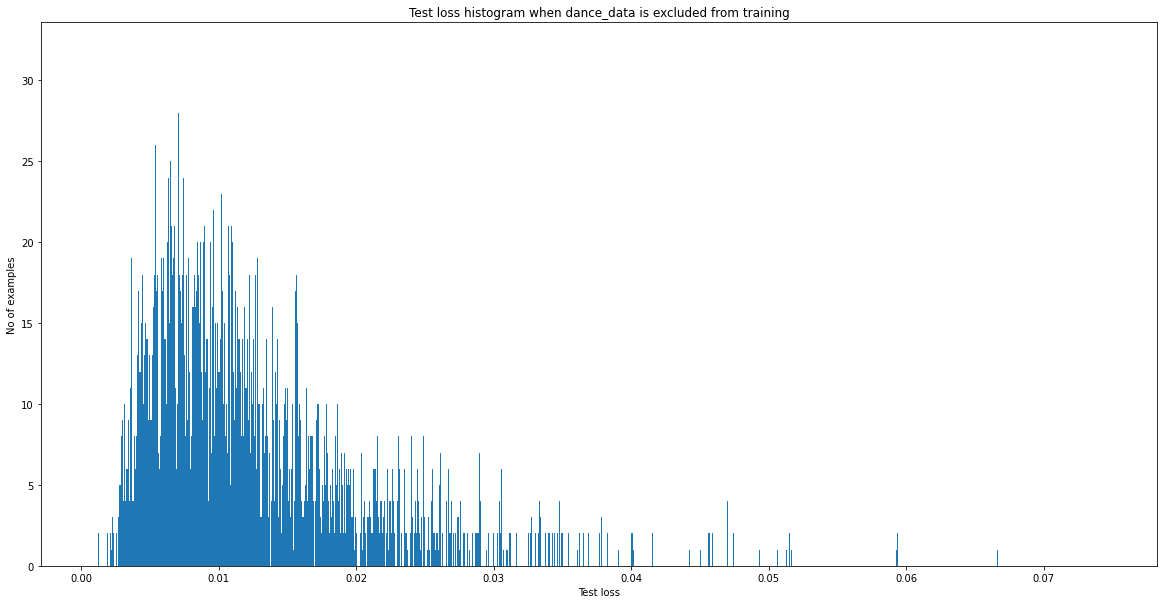

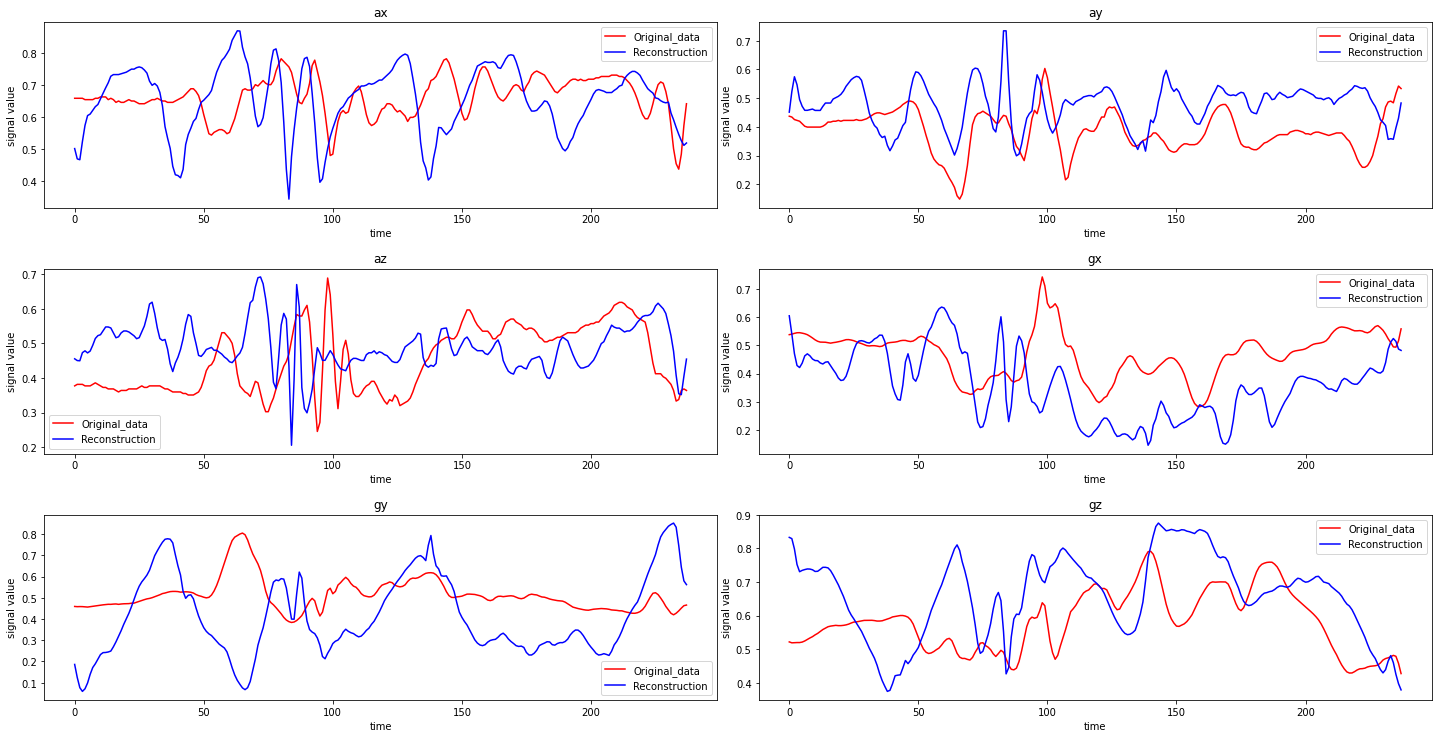

testing on:  des_data
(14280, 6)
Epoch 1/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0099 - val_loss: 0.0093
Epoch 2/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0093 - val_loss: 0.0117
Epoch 3/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0091 - val_loss: 0.0104
Epoch 4/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0089 - val_loss: 0.0075
Epoch 5/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0084 - val_loss: 0.0070
Epoch 6/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 7/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0079 - val_loss: 0.0061
Epoch 8/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0069 - val_loss: 0.0072
Epoch 9/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0071 - val_loss: 0.0065
Epoch 10/20
151/151 [==============================] - 1s 7ms/step 

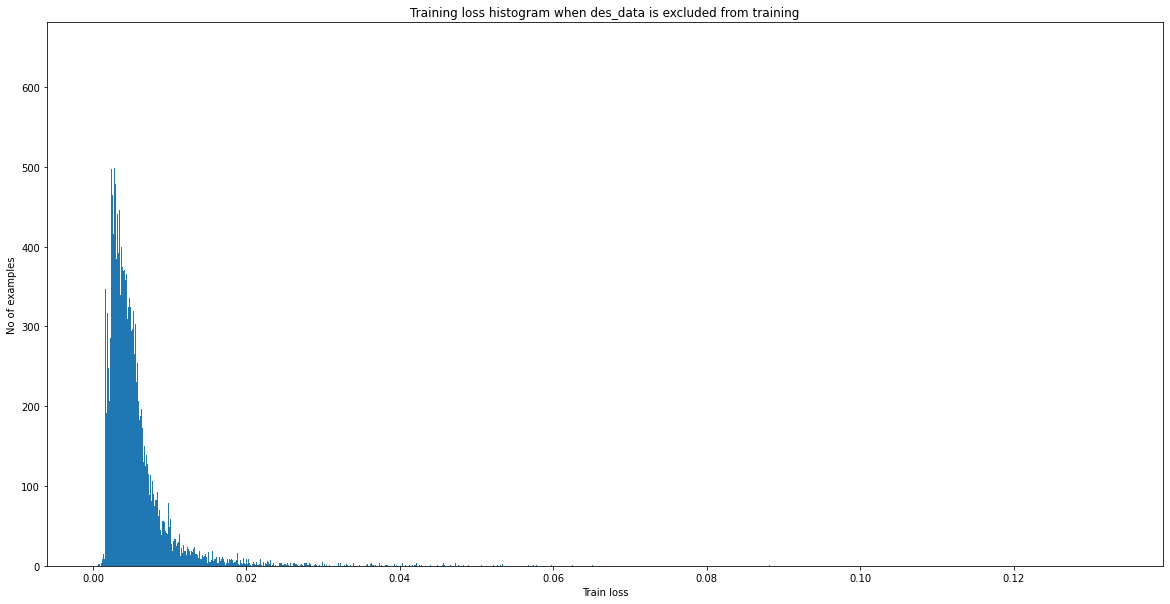

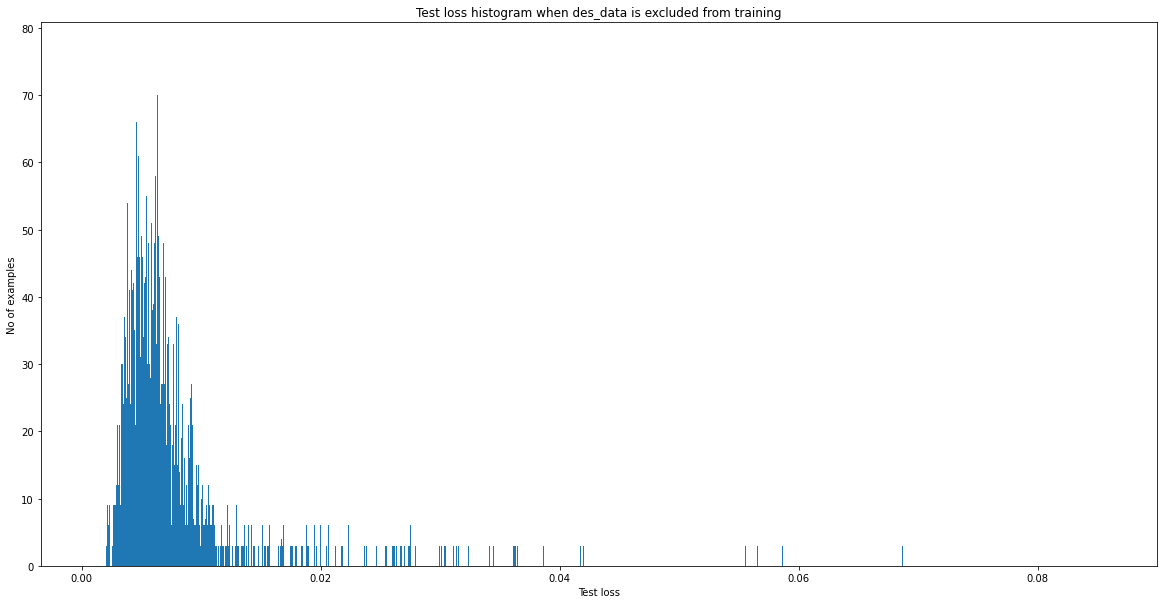

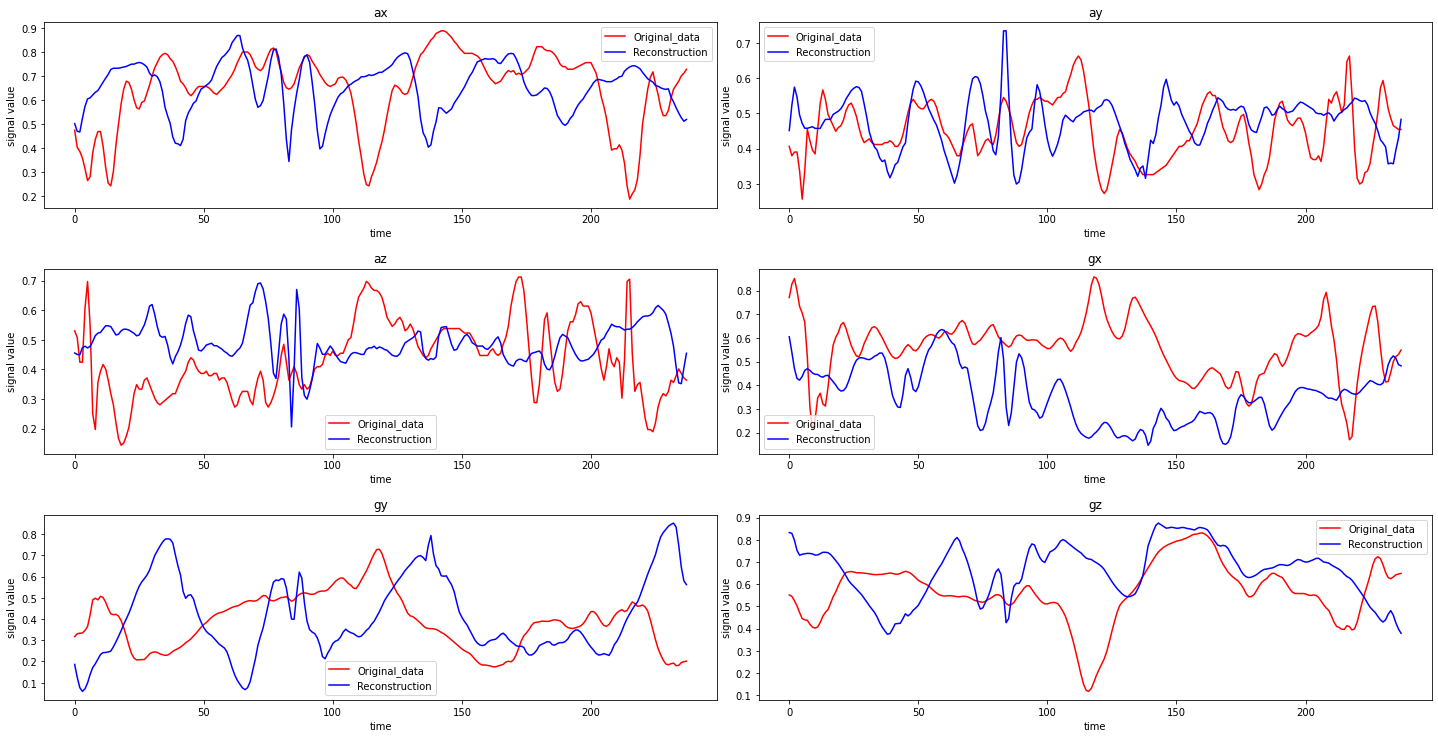

testing on:  jump_data
(14280, 6)
Epoch 1/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 2/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0060 - val_loss: 0.0051
Epoch 3/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0053 - val_loss: 0.0046
Epoch 4/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0064 - val_loss: 0.0061
Epoch 5/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0059 - val_loss: 0.0066
Epoch 6/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0070 - val_loss: 0.0061
Epoch 7/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0060 - val_loss: 0.0048
Epoch 8/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 9/20
151/151 [==============================] - 1s 7ms/step - loss: 0.0047 - val_loss: 0.0060
Epoch 10/20
151/151 [==============================] - 1s 7ms/step

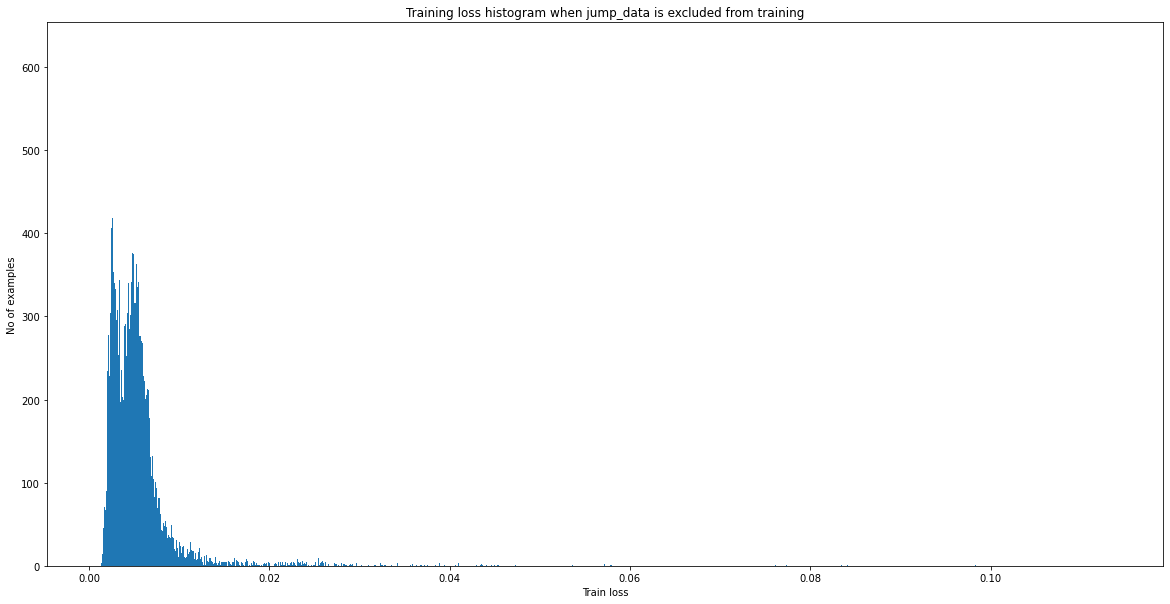

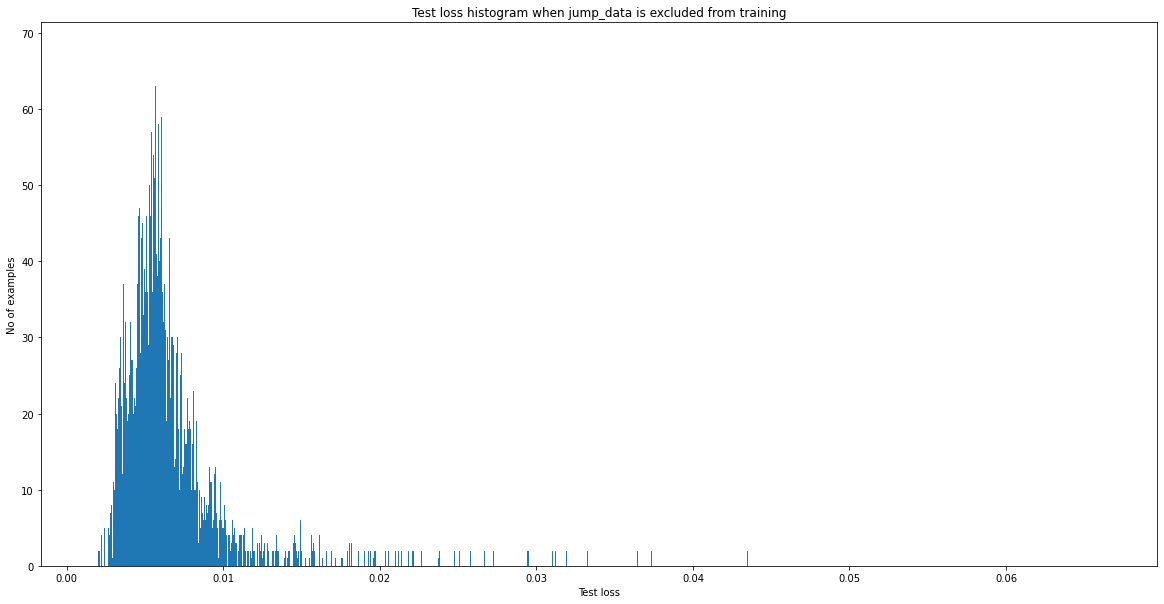

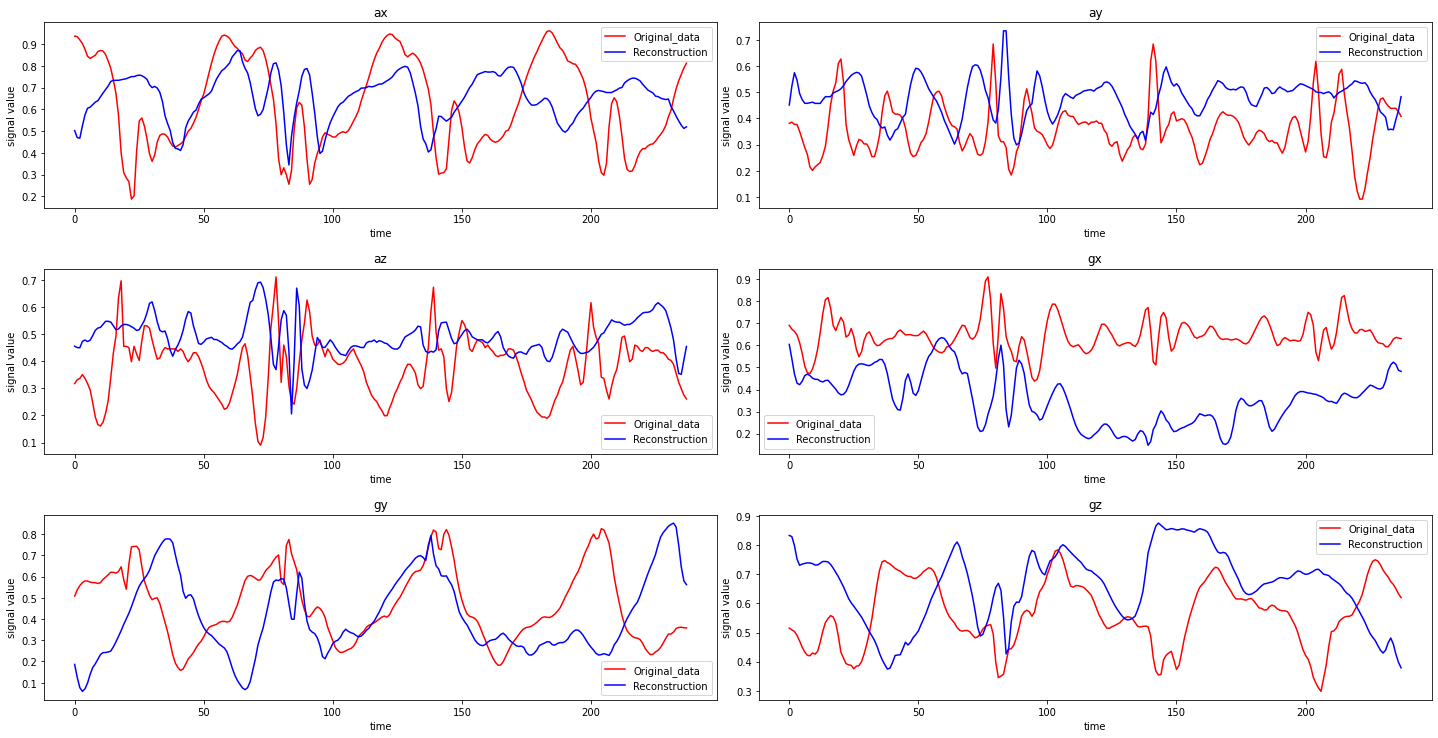

testing on:  sit_data
(14280, 6)
Epoch 1/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0078 - val_loss: 0.0062
Epoch 2/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0065 - val_loss: 0.0053
Epoch 3/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 4/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0069 - val_loss: 0.0047
Epoch 5/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0060 - val_loss: 0.0050
Epoch 6/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0060 - val_loss: 0.0053
Epoch 7/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0060 - val_loss: 0.0060
Epoch 8/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0057 - val_loss: 0.0059
Epoch 9/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0063 - val_loss: 0.0054
Epoch 10/20
151/151 [==============================] - 1s 8ms/step 

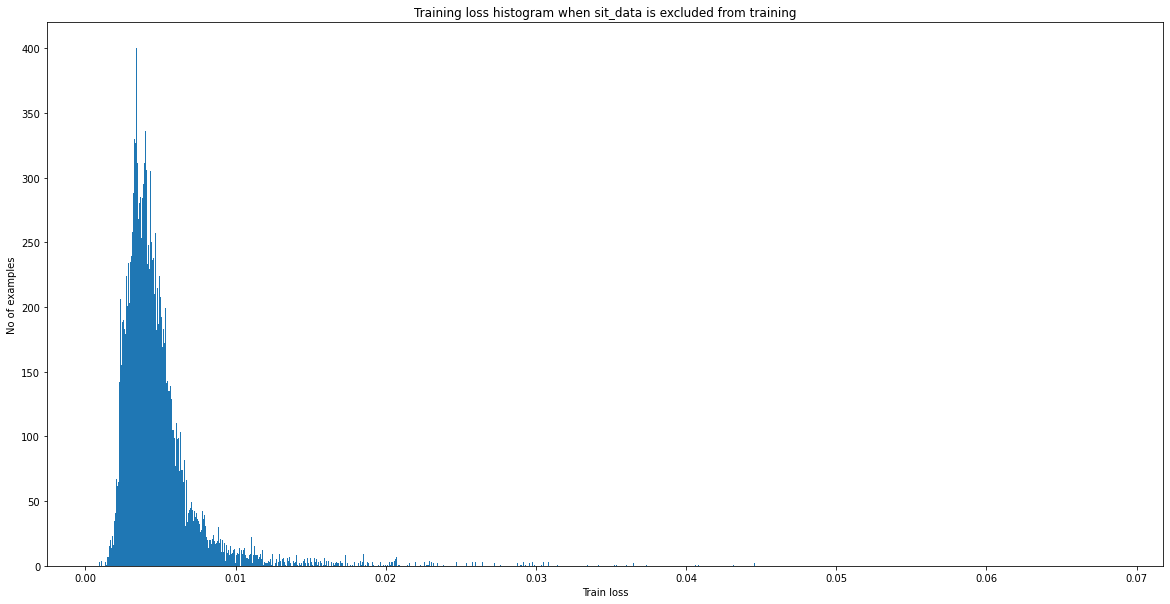

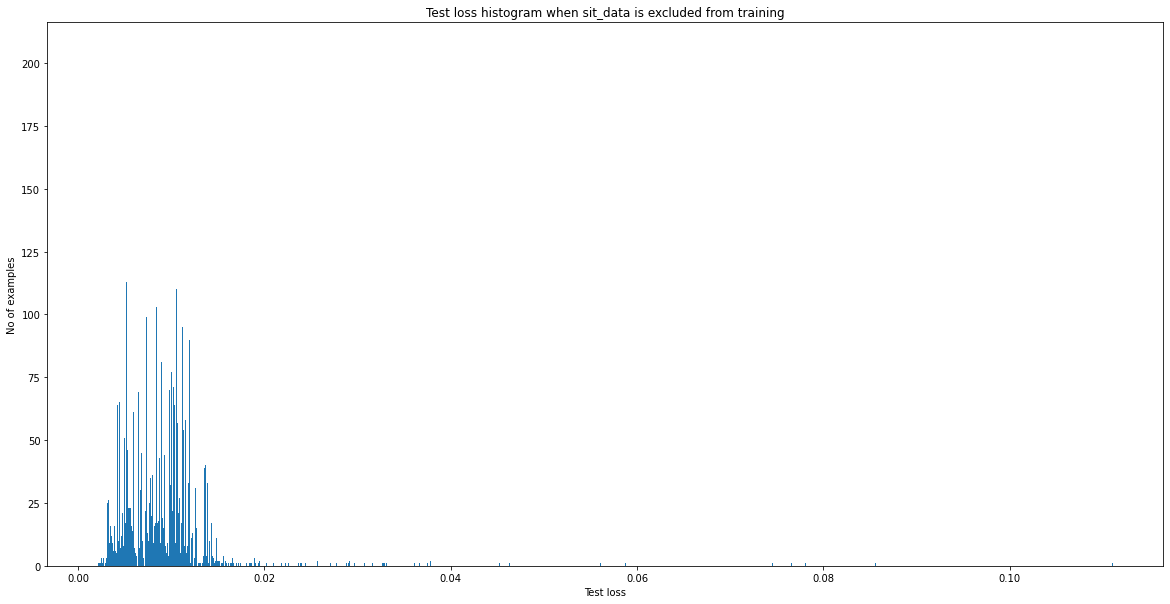

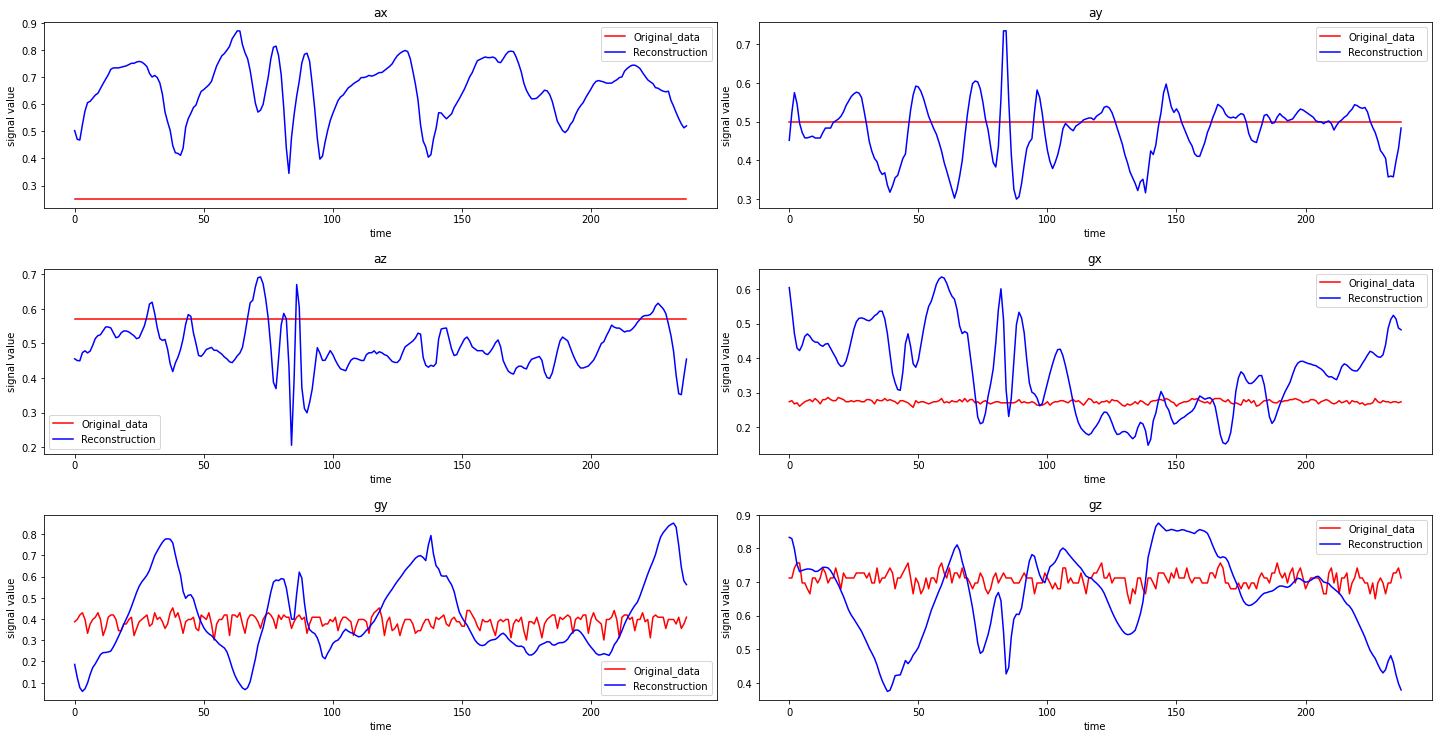

testing on:  stand_data
(14280, 6)
Epoch 1/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0056 - val_loss: 0.0053
Epoch 2/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0049 - val_loss: 0.0050
Epoch 3/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0054 - val_loss: 0.0060
Epoch 4/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0051 - val_loss: 0.0062
Epoch 5/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0053 - val_loss: 0.0054
Epoch 6/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0051 - val_loss: 0.0056
Epoch 7/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 8/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 9/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0057 - val_loss: 0.0058
Epoch 10/20
151/151 [==============================] - 1s 9ms/ste

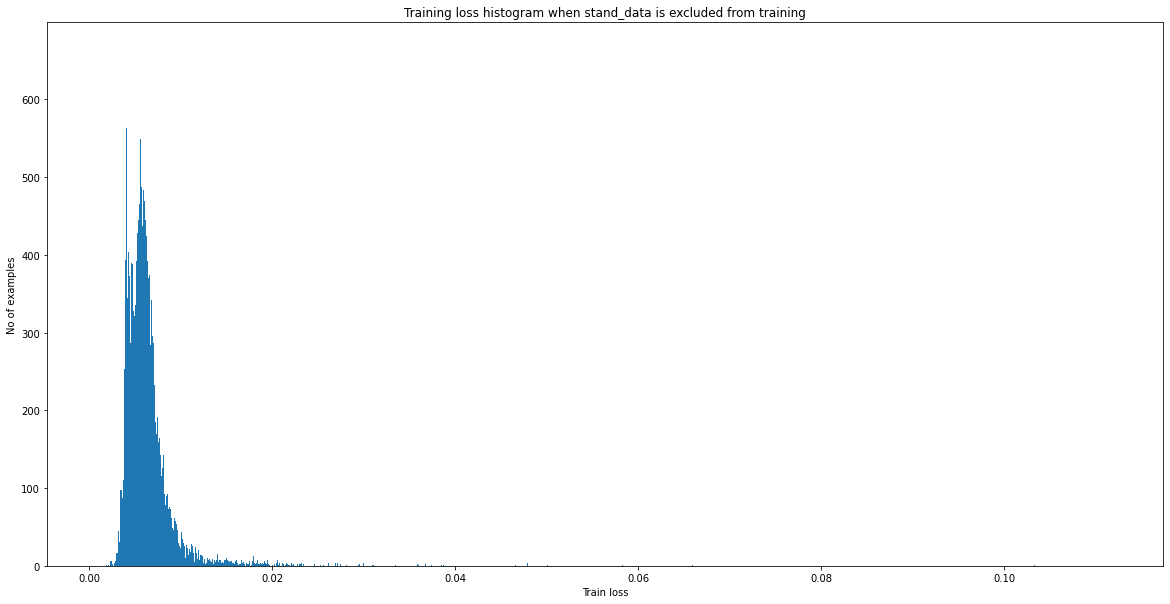

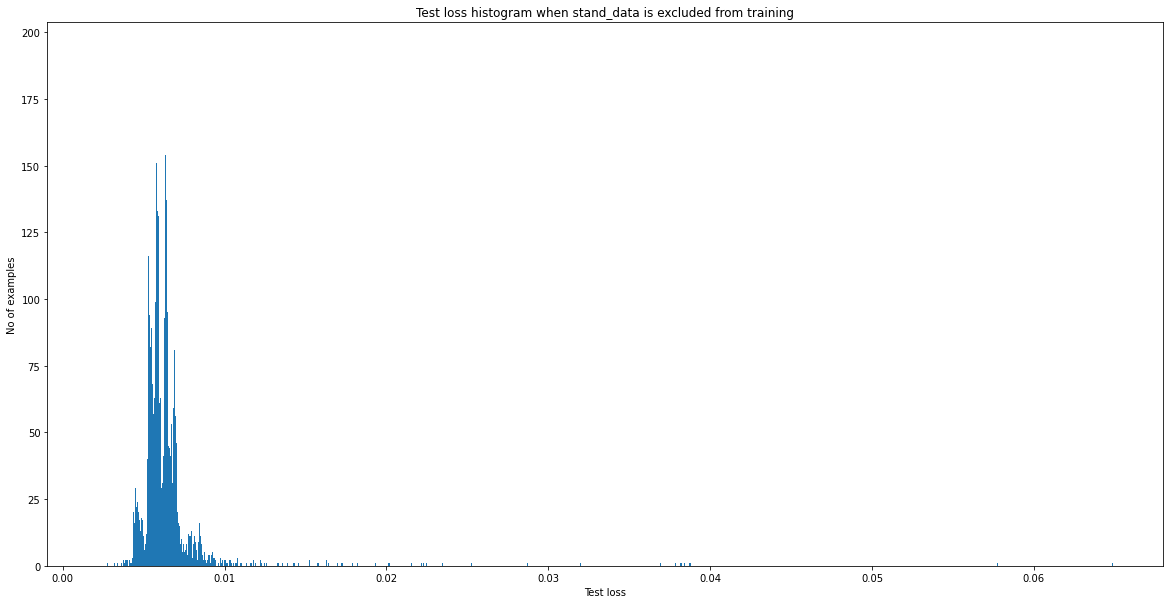

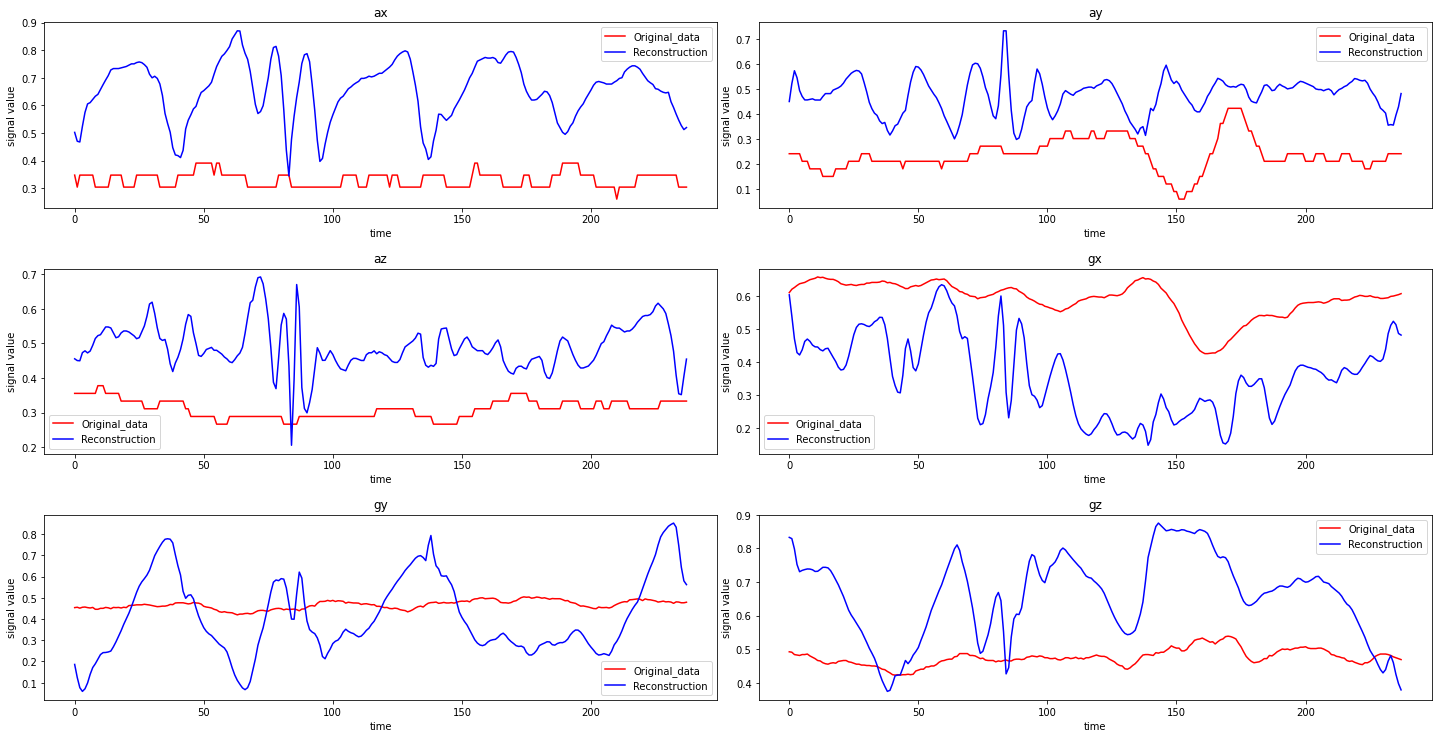

testing on:  walk_data
(14280, 6)
Epoch 1/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0054 - val_loss: 0.0058
Epoch 2/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 3/20
151/151 [==============================] - 1s 8ms/step - loss: 0.0048 - val_loss: 0.0058
Epoch 4/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0047 - val_loss: 0.0037
Epoch 5/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 6/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0053 - val_loss: 0.0062
Epoch 7/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0053 - val_loss: 0.0041
Epoch 8/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0045 - val_loss: 0.0050
Epoch 9/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0052 - val_loss: 0.0044
Epoch 10/20
151/151 [==============================] - 1s 9ms/step

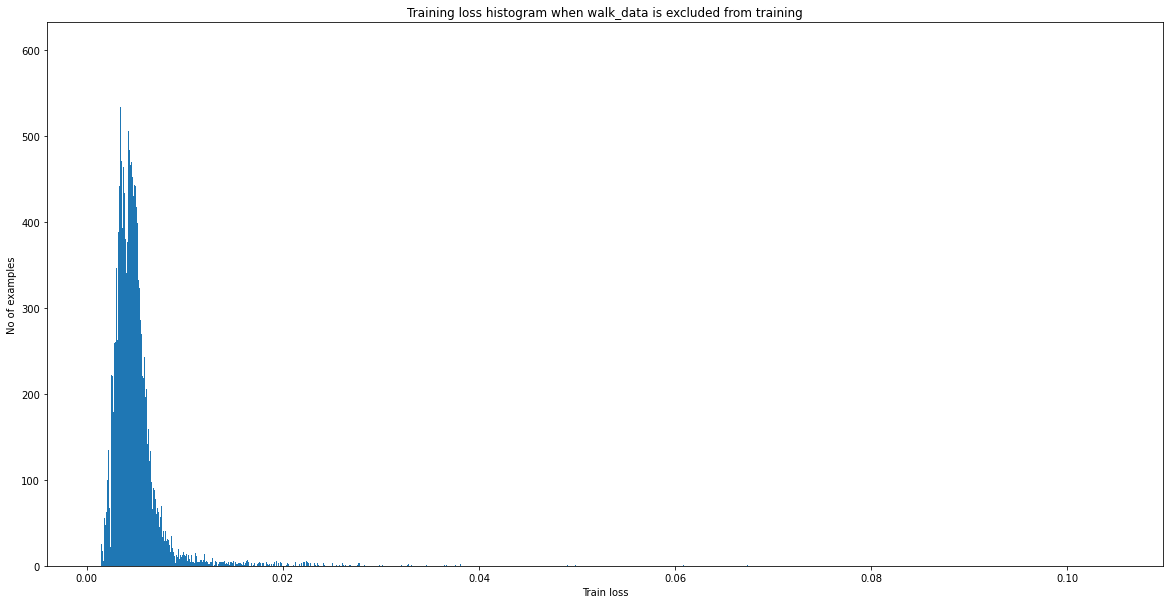

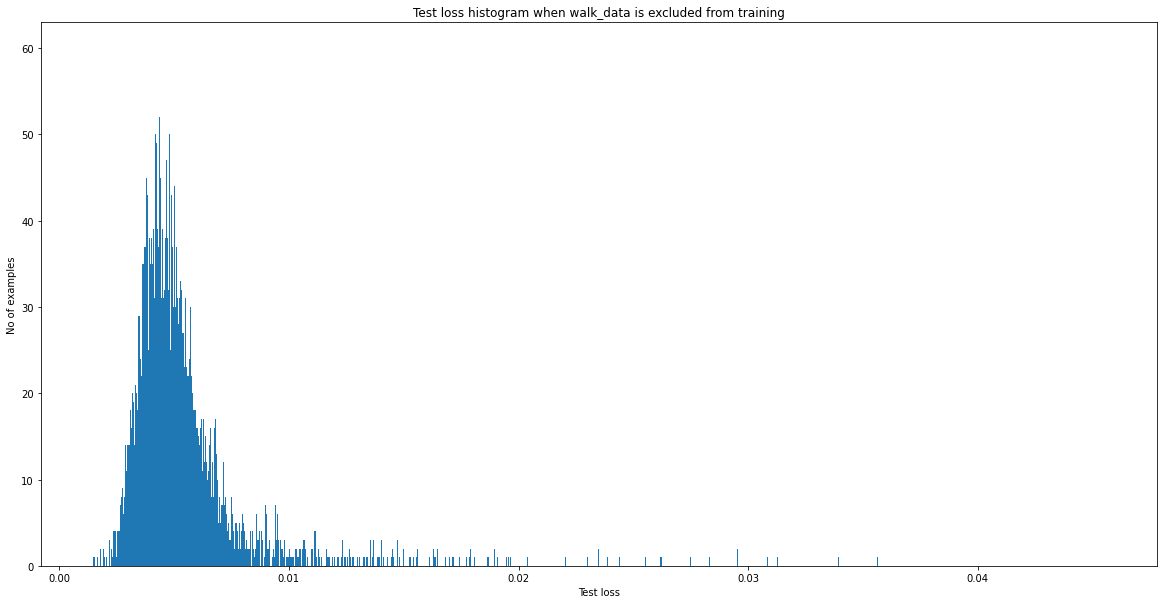

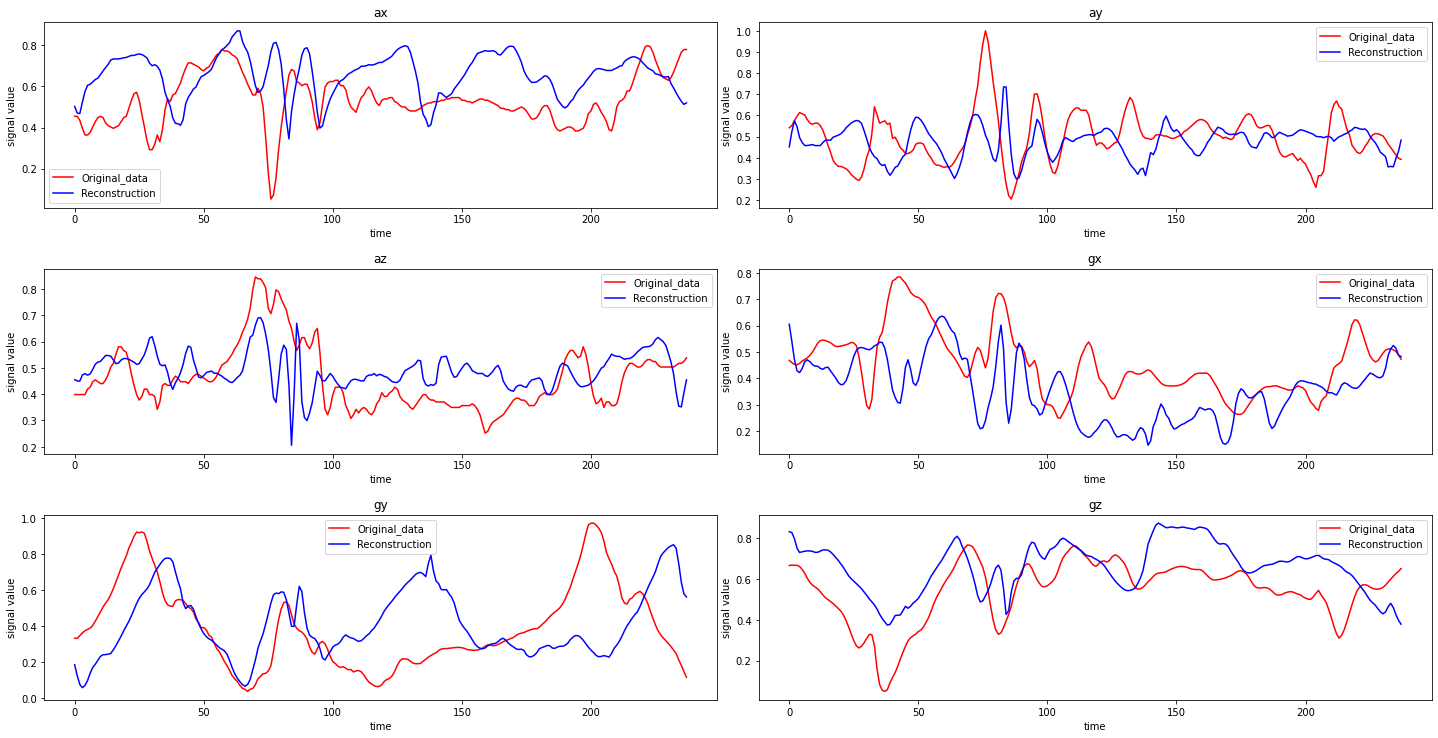

testing on:  eat_data
(14280, 6)
Epoch 1/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0047 - val_loss: 0.0039
Epoch 2/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0045 - val_loss: 0.0050
Epoch 3/20
151/151 [==============================] - 1s 10ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 4/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 5/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 6/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0044 - val_loss: 0.0064
Epoch 7/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0050 - val_loss: 0.0056
Epoch 8/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0046 - val_loss: 0.0062
Epoch 9/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0054 - val_loss: 0.0045
Epoch 10/20
151/151 [==============================] - 1s 9ms/step

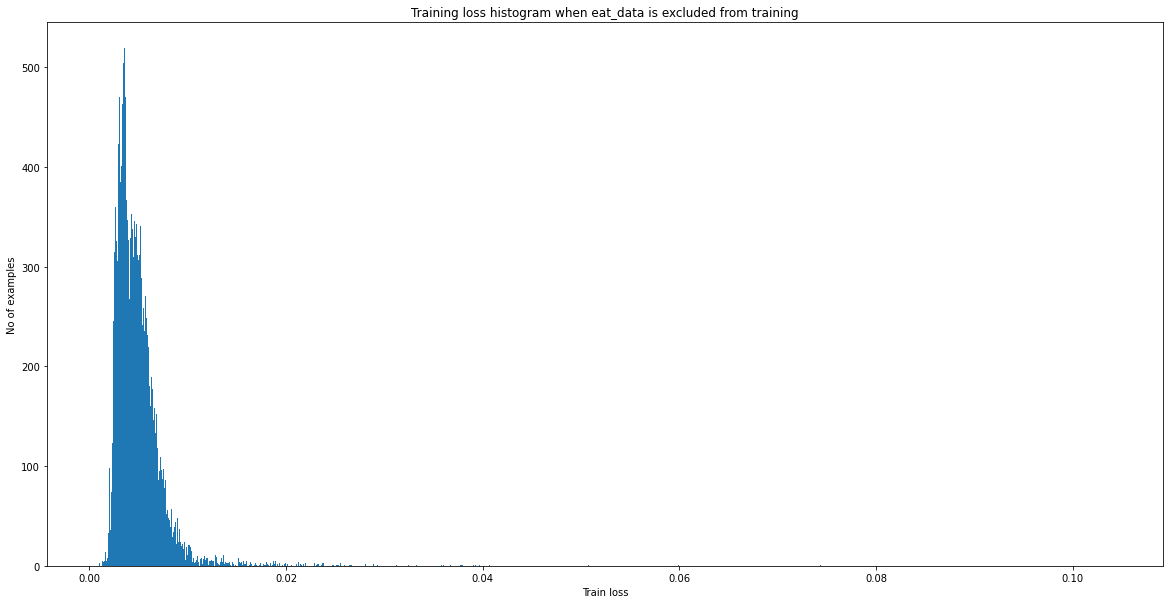

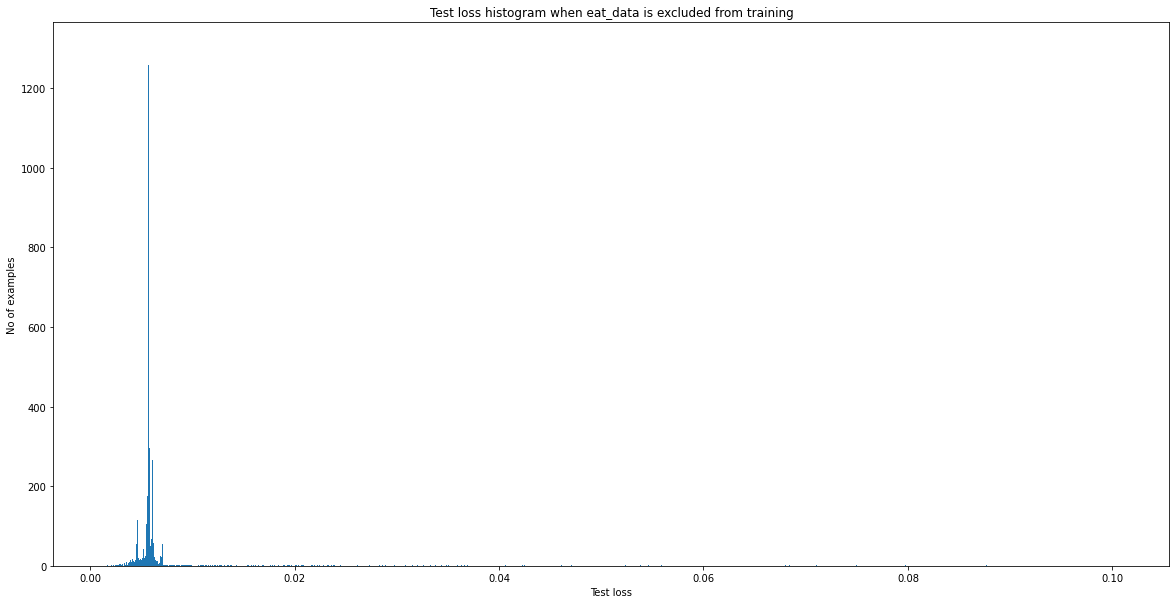

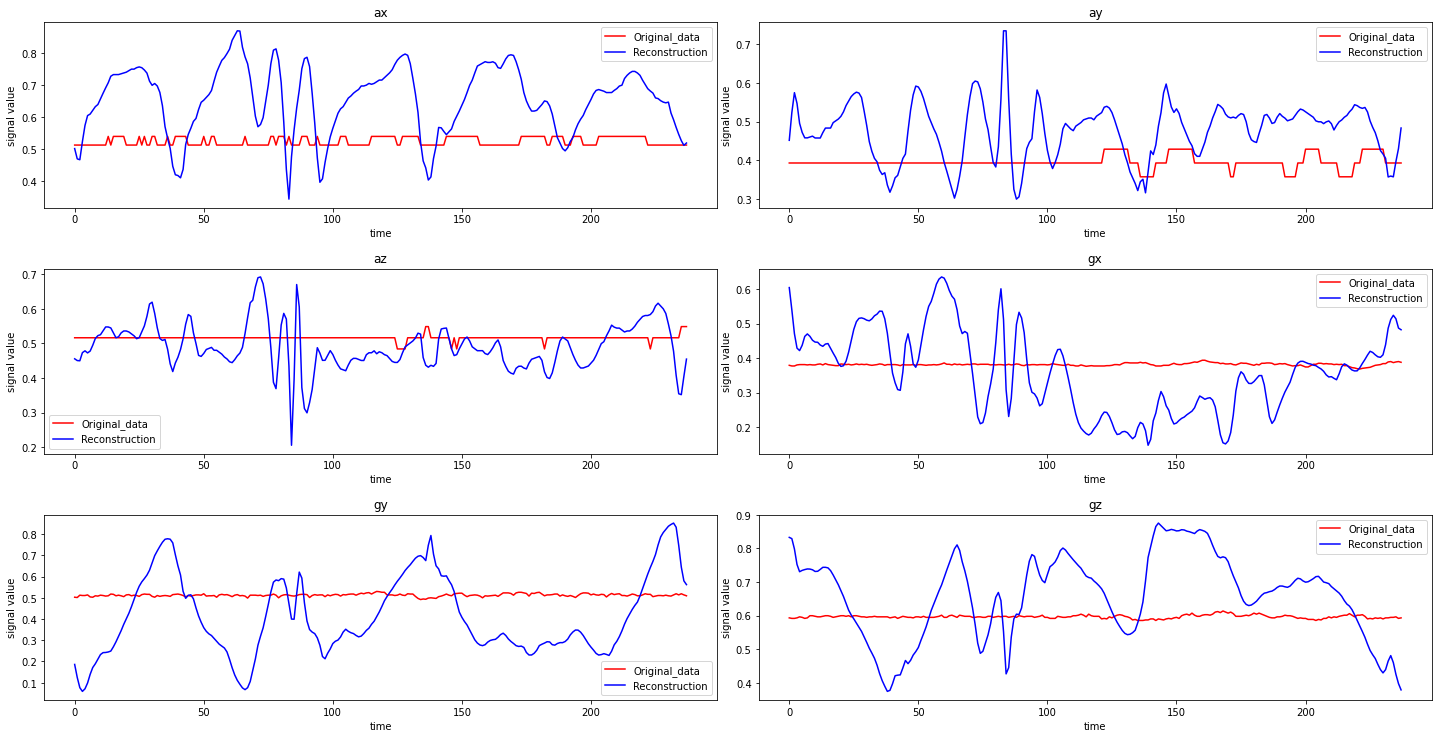

testing on:  pushf_data
(14280, 6)
Epoch 1/20
151/151 [==============================] - 1s 10ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 2/20
151/151 [==============================] - 2s 10ms/step - loss: 0.0042 - val_loss: 0.0038
Epoch 3/20
151/151 [==============================] - 1s 10ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 4/20
151/151 [==============================] - 1s 10ms/step - loss: 0.0044 - val_loss: 0.0046
Epoch 5/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 6/20
151/151 [==============================] - 1s 10ms/step - loss: 0.0043 - val_loss: 0.0053
Epoch 7/20
151/151 [==============================] - 1s 10ms/step - loss: 0.0047 - val_loss: 0.0049
Epoch 8/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 9/20
151/151 [==============================] - 1s 10ms/step - loss: 0.0044 - val_loss: 0.0063
Epoch 10/20
151/151 [==============================] - 1s 

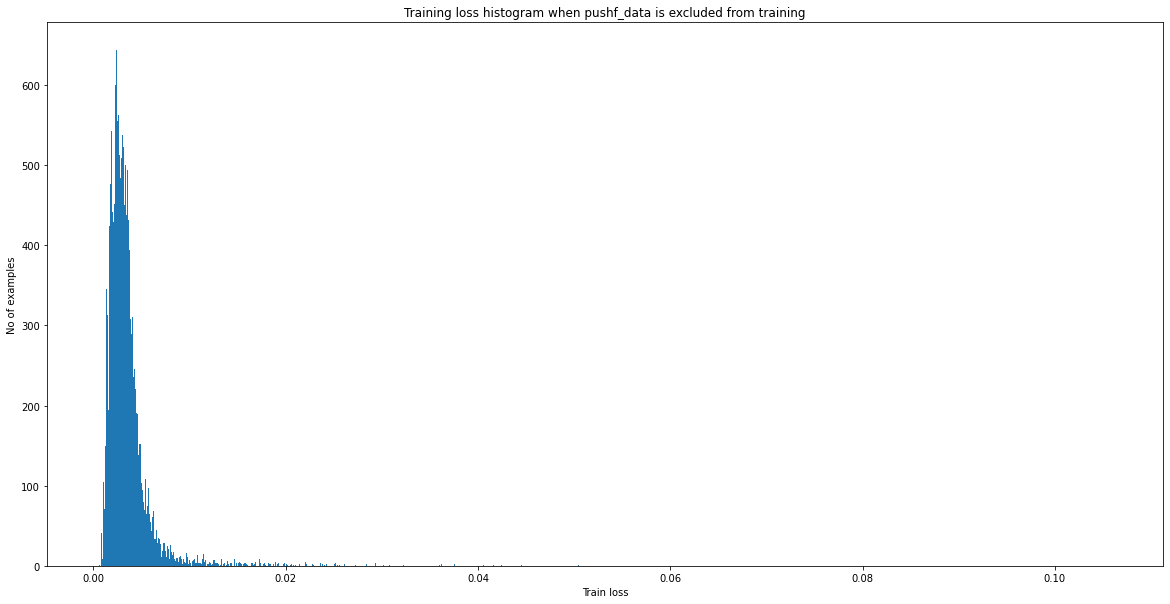

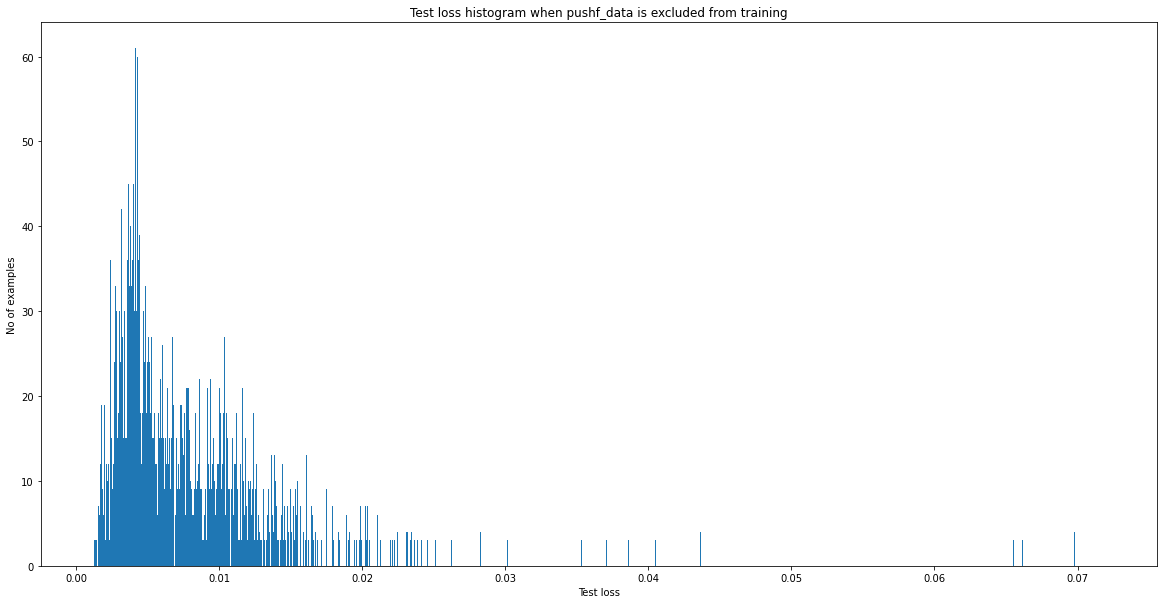

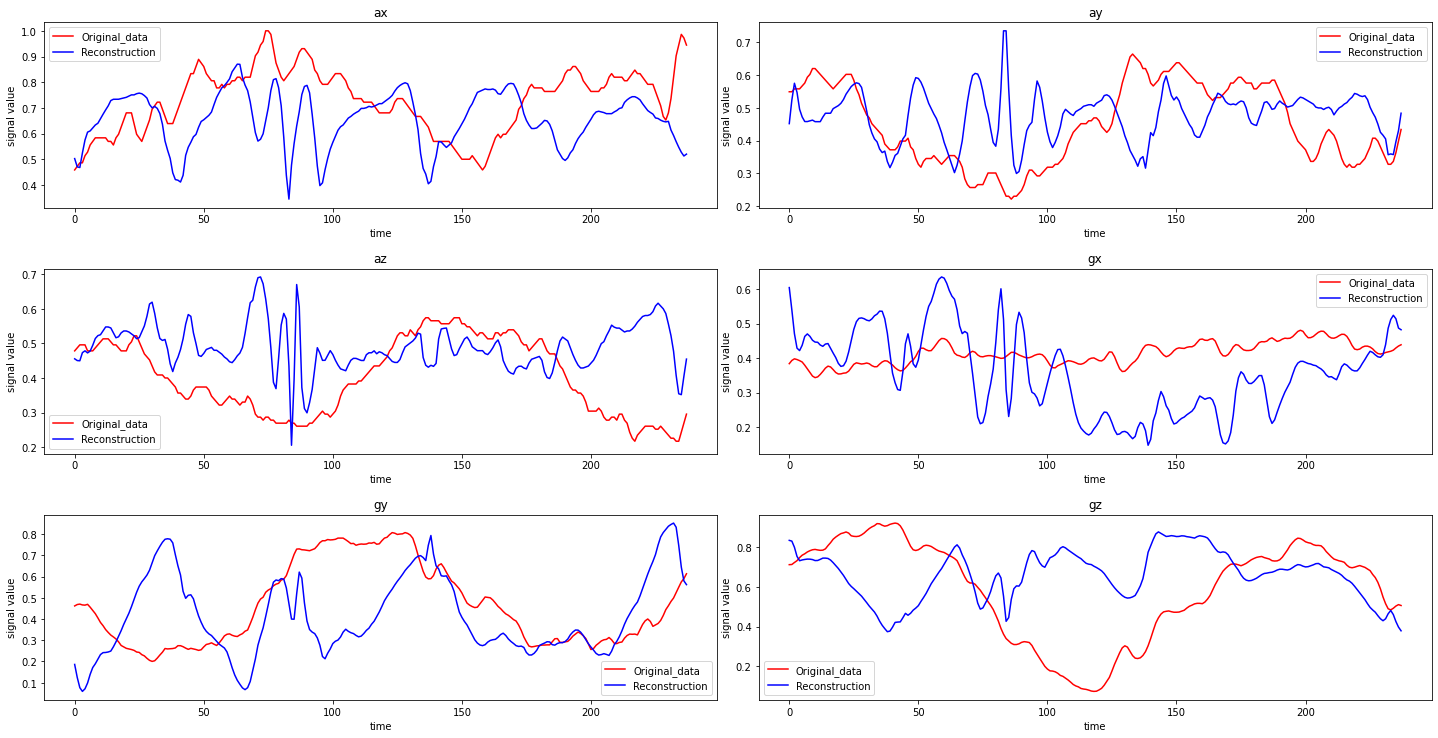

testing on:  pushg_data
(14280, 6)
Epoch 1/20
151/151 [==============================] - 2s 10ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 2/20
151/151 [==============================] - 1s 10ms/step - loss: 0.0047 - val_loss: 0.0066
Epoch 3/20
151/151 [==============================] - 2s 10ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 4/20
151/151 [==============================] - 1s 10ms/step - loss: 0.0051 - val_loss: 0.0044
Epoch 5/20
151/151 [==============================] - 1s 10ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 6/20
151/151 [==============================] - 1s 10ms/step - loss: 0.0037 - val_loss: 0.0050
Epoch 7/20
151/151 [==============================] - 1s 9ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 8/20
151/151 [==============================] - 1s 10ms/step - loss: 0.0044 - val_loss: 0.0065
Epoch 9/20
151/151 [==============================] - 1s 10ms/step - loss: 0.0048 - val_loss: 0.0053
Epoch 10/20
151/151 [==============================] - 2s

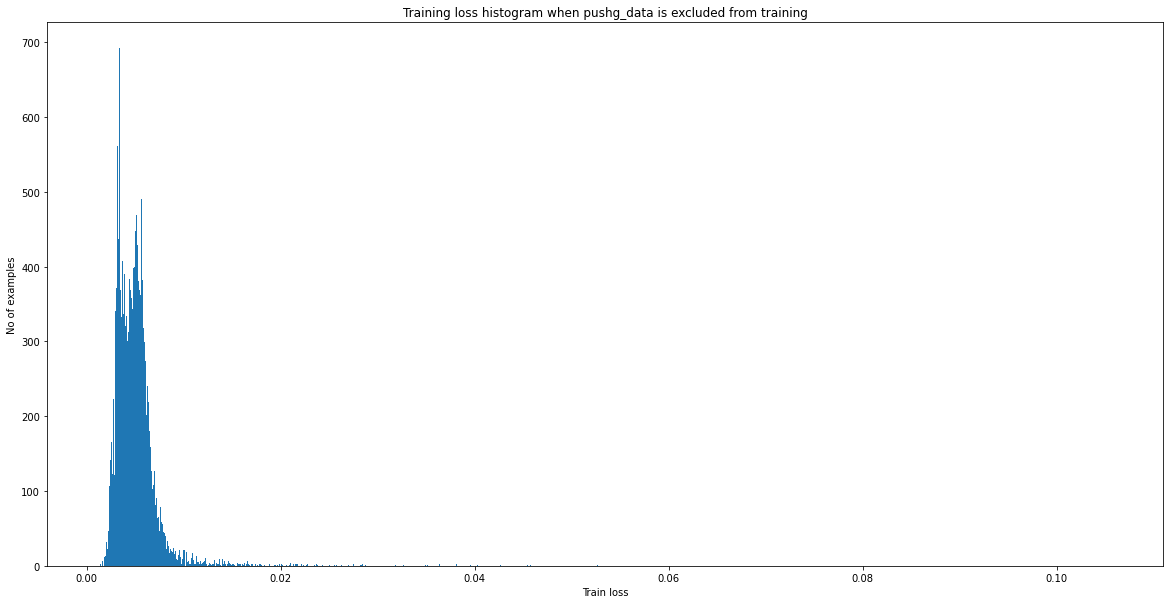

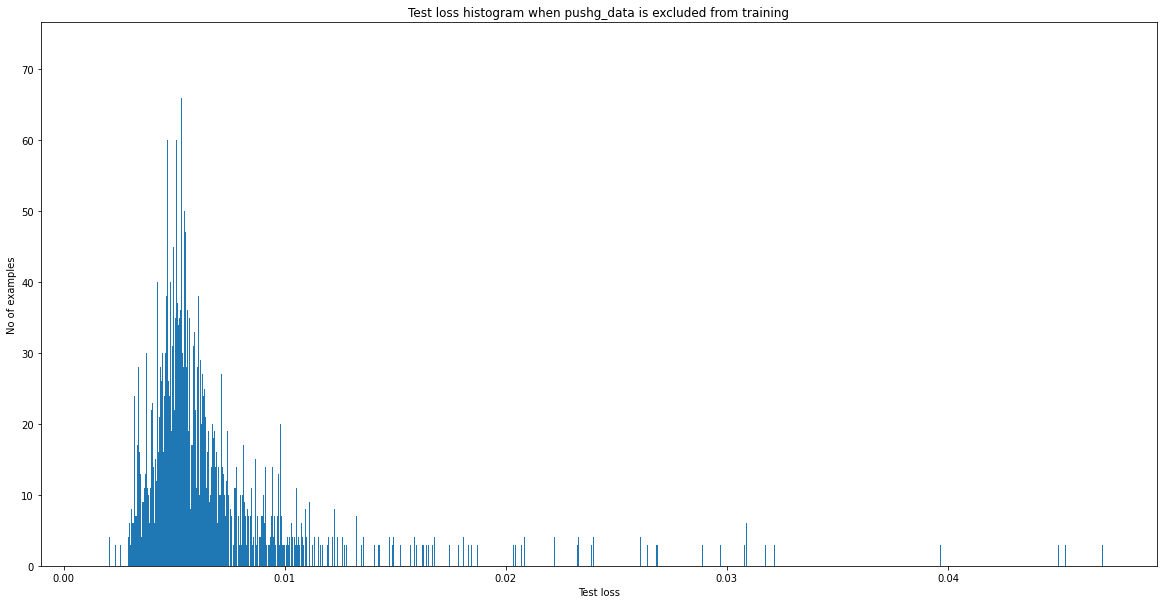

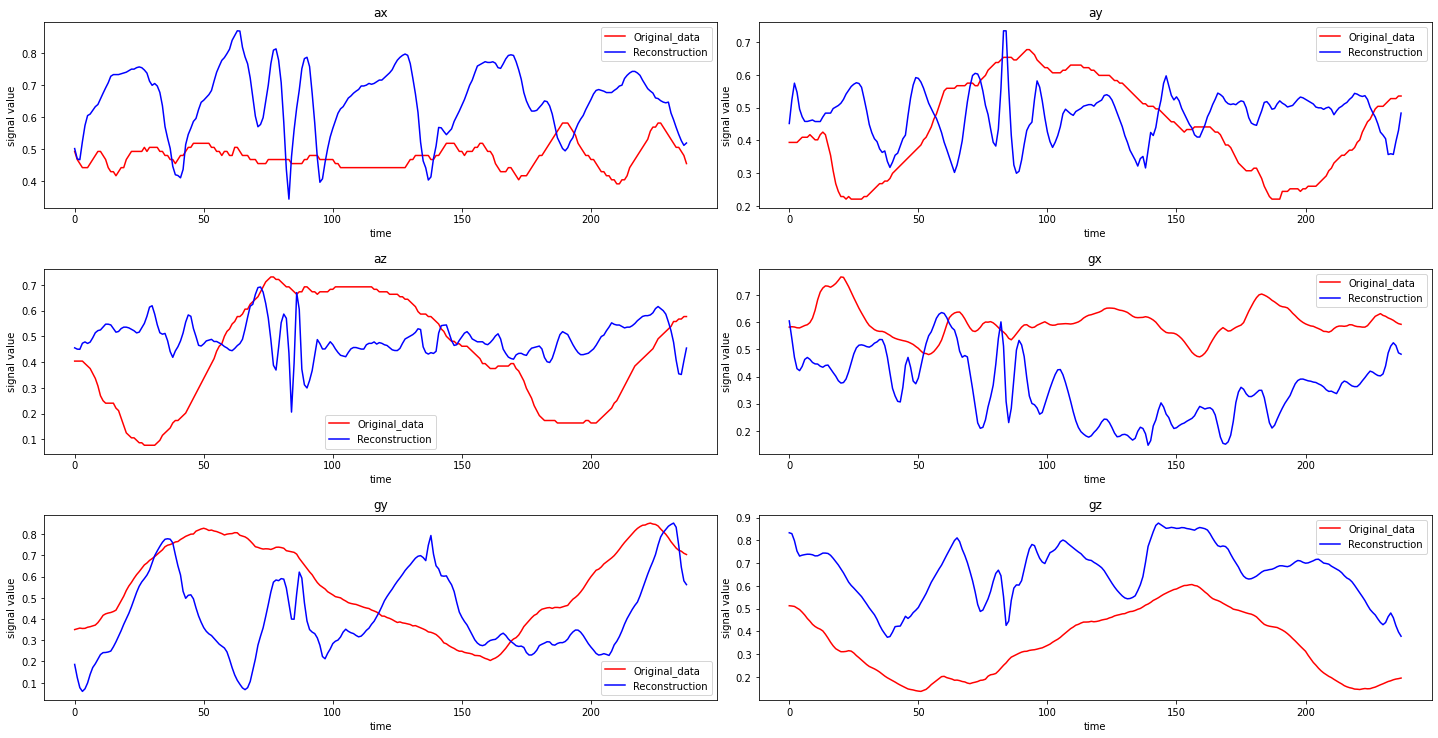

testing on:  laptop_data
(14280, 6)
Epoch 1/20
151/151 [==============================] - 2s 10ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 2/20
151/151 [==============================] - 2s 10ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 3/20
151/151 [==============================] - 2s 10ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 4/20
151/151 [==============================] - 2s 11ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 5/20
151/151 [==============================] - 2s 10ms/step - loss: 0.0041 - val_loss: 0.0044
Epoch 6/20
151/151 [==============================] - 2s 10ms/step - loss: 0.0042 - val_loss: 0.0045
Epoch 7/20
151/151 [==============================] - 2s 10ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 8/20
151/151 [==============================] - 2s 10ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 9/20
151/151 [==============================] - 2s 11ms/step - loss: 0.0036 - val_loss: 0.0041
Epoch 10/20
151/151 [==============================] - 

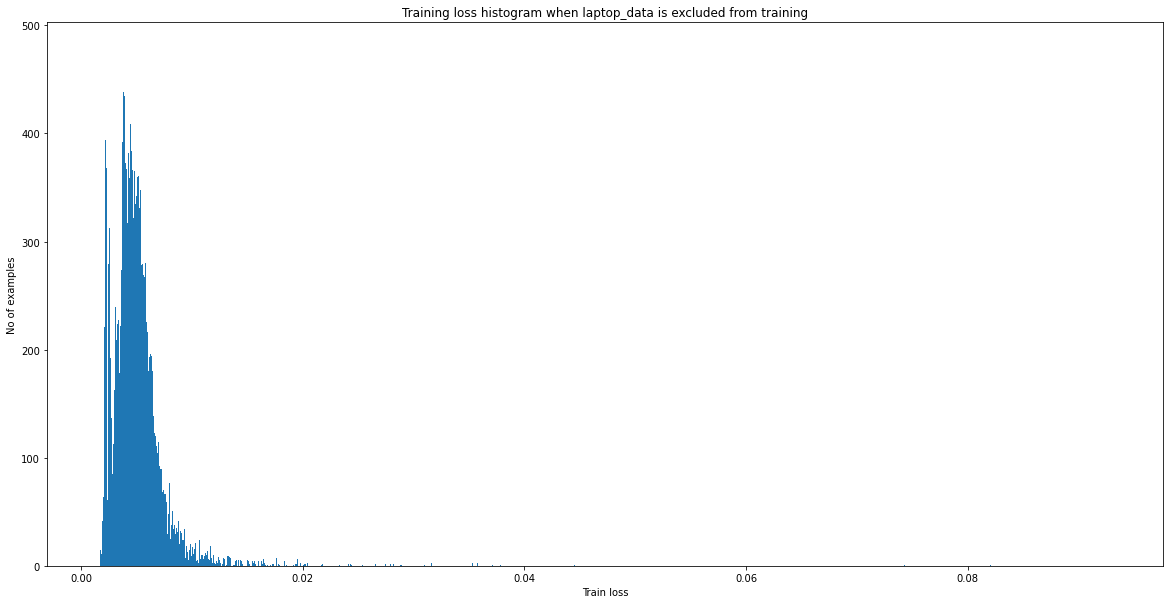

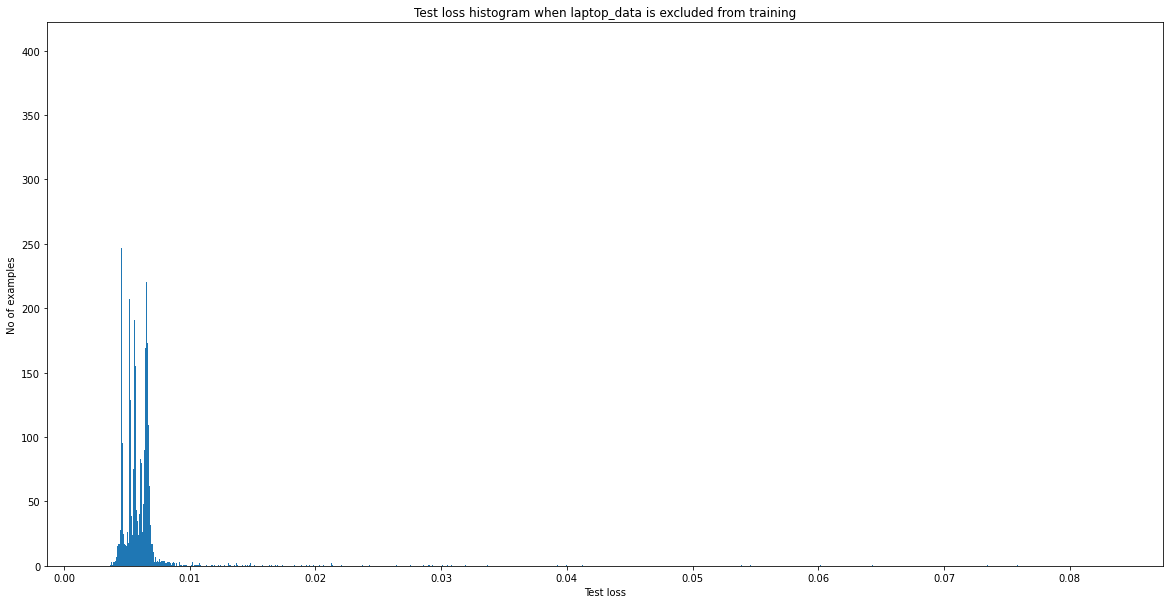

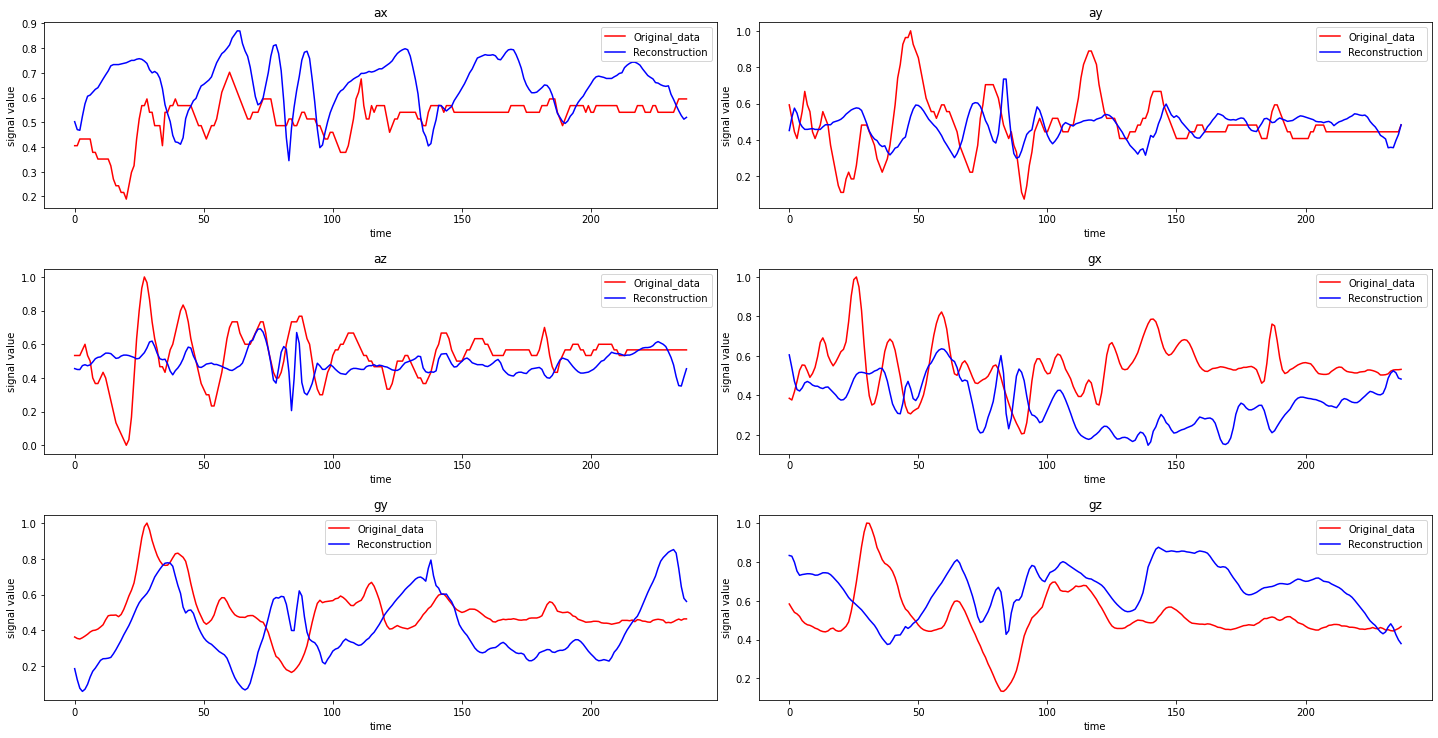

testing on:  run_data
(14280, 6)
Epoch 1/20
151/151 [==============================] - 2s 11ms/step - loss: 0.0043 - val_loss: 0.0031
Epoch 2/20
151/151 [==============================] - 2s 11ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 3/20
151/151 [==============================] - 2s 11ms/step - loss: 0.0043 - val_loss: 0.0048
Epoch 4/20
151/151 [==============================] - 2s 10ms/step - loss: 0.0051 - val_loss: 0.0044
Epoch 5/20
151/151 [==============================] - 2s 11ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 6/20
151/151 [==============================] - 2s 11ms/step - loss: 0.0049 - val_loss: 0.0056
Epoch 7/20
151/151 [==============================] - 2s 11ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 8/20
151/151 [==============================] - 2s 11ms/step - loss: 0.0042 - val_loss: 0.0034
Epoch 9/20
151/151 [==============================] - 2s 11ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 10/20
151/151 [==============================] - 2s 

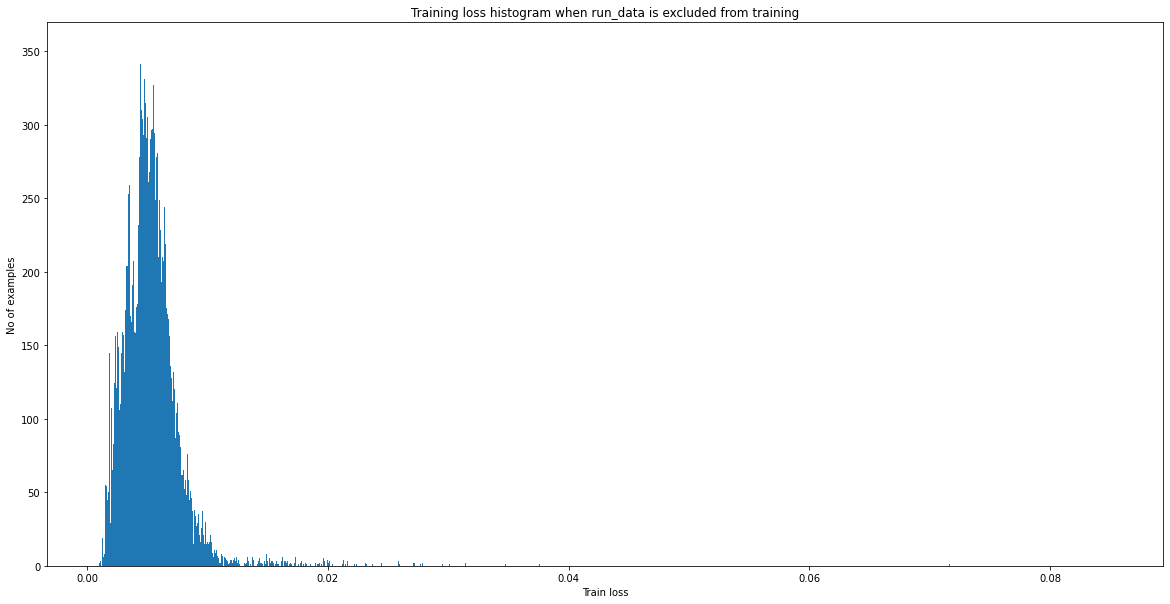

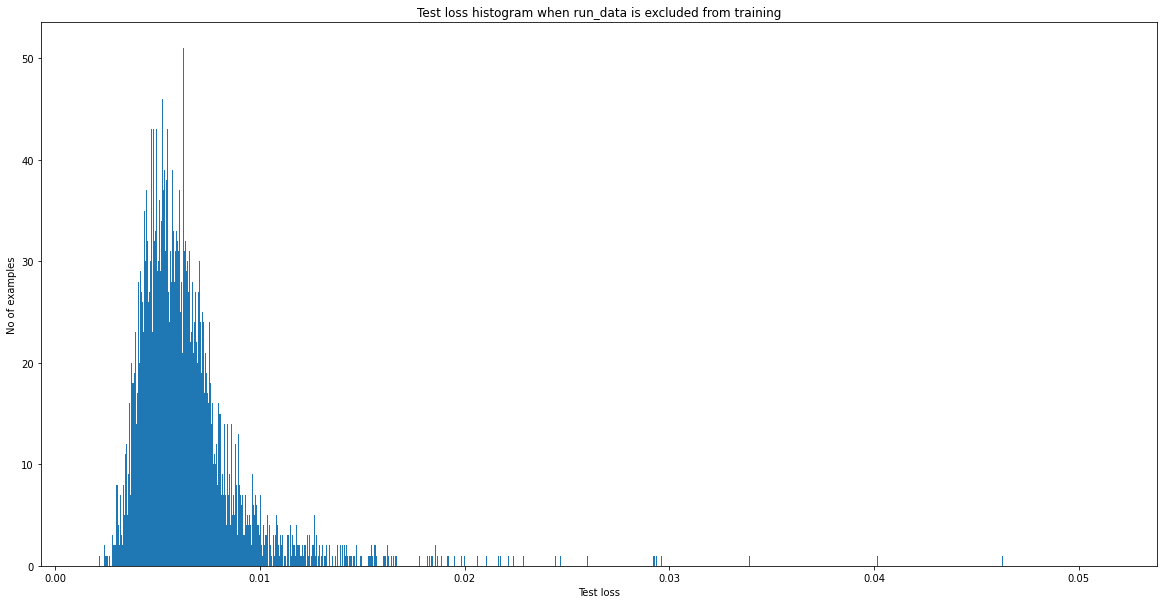

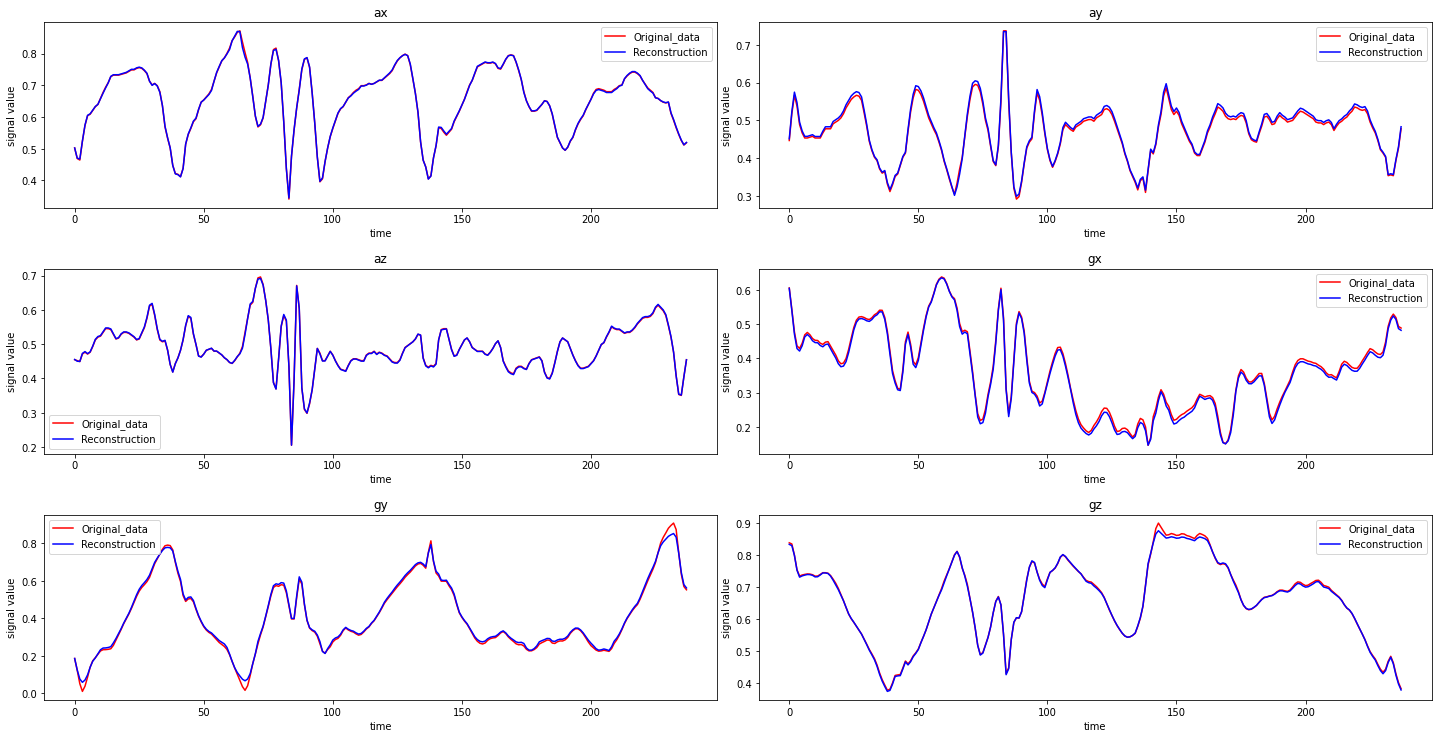

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

names = ['asc_data','dance_data','des_data','jump_data','sit_data','stand_data','walk_data','eat_data','pushf_data','pushg_data','laptop_data','run_data']
for i in range(12):
    print('testing on: ',names[i])
    data1 = full_data[:,:,:i]
    data2 = full_data[:,:,i+1:]
    comb_data = np.concatenate((data1,data2),axis = 2)
    train_data = comb_data[:,:,0]
    for j in range(1,6):
        train_data = np.concatenate((train_data,comb_data[:,:,j]),axis = 0)
    train, valid = train_test_split(train_data, test_size=0.1, random_state=21)
    test_data = full_data[:,:,i]
    model.fit(train, train,epochs=20,batch_size=512,validation_data=(valid, valid),shuffle=True)

    predictions_test = model.predict(test_data)
    predictions_train = model.predict(train)
    test_loss = tf.keras.losses.mae(predictions_test, test_data)
    train_loss = tf.keras.losses.mae(predictions_train, train)

    plt.hist(train_loss, bins=5000)
    plt.xlabel("Train loss")
    plt.ylabel("No of examples")
    plt.title("Training loss histogram when "+names[i]+" is excluded from training")
    plt.show()

    plt.hist(test_loss, bins=5000)
    plt.xlabel("Test loss")
    plt.ylabel("No of examples")
    plt.title("Test loss histogram when "+names[i]+" is excluded from training")
    plt.show()

    figure, axis = plt.subplots(3, 2)
    figure.tight_layout(h_pad=4)

    axis[0,0].plot(range(238),test_data[238:238*2,0],color='r',label = 'Original_data')
    axis[0,0].plot(range(238),predictions[238:238*2,0],color='b',label = 'Reconstruction')
    axis[0,0].set_xlabel('time')
    axis[0,0].set_ylabel('signal value')
    axis[0,0].set_title('ax')
    axis[0,0].legend()

    axis[0,1].plot(range(238),test_data[238:238*2,1],color='r',label = 'Original_data')
    axis[0,1].plot(range(238),predictions[238:238*2,1],color='b',label = 'Reconstruction')
    axis[0,1].set_xlabel('time')
    axis[0,1].set_ylabel('signal value')
    axis[0,1].set_title('ay')
    axis[0,1].legend()

    axis[1,0].plot(range(238),test_data[238:238*2,2],color='r',label = 'Original_data')
    axis[1,0].plot(range(238),predictions[238:238*2,2],color='b',label = 'Reconstruction')
    axis[1,0].set_xlabel('time')
    axis[1,0].set_ylabel('signal value')
    axis[1,0].set_title('az')
    axis[1,0].legend()

    axis[1,1].plot(range(238),test_data[238:238*2,3],color='r',label = 'Original_data')
    axis[1,1].plot(range(238),predictions[238:238*2,3],color='b',label = 'Reconstruction')
    axis[1,1].set_xlabel('time')
    axis[1,1].set_ylabel('signal value')
    axis[1,1].set_title('gx')
    axis[1,1].legend()

    axis[2,0].plot(range(238),test_data[238:238*2,4],color='r',label = 'Original_data')
    axis[2,0].plot(range(238),predictions[238:238*2,4],color='b',label = 'Reconstruction')
    axis[2,0].set_xlabel('time')
    axis[2,0].set_ylabel('signal value')
    axis[2,0].set_title('gy')
    axis[2,0].legend()

    axis[2,1].plot(range(238),test_data[238:238*2,5],color='r',label = 'Original_data')
    axis[2,1].plot(range(238),predictions[238:238*2,5],color='b',label = 'Reconstruction')
    axis[2,1].set_xlabel('time')
    axis[2,1].set_ylabel('signal value')
    axis[2,1].set_title('gz')
    axis[2,1].legend()
    plt.show()



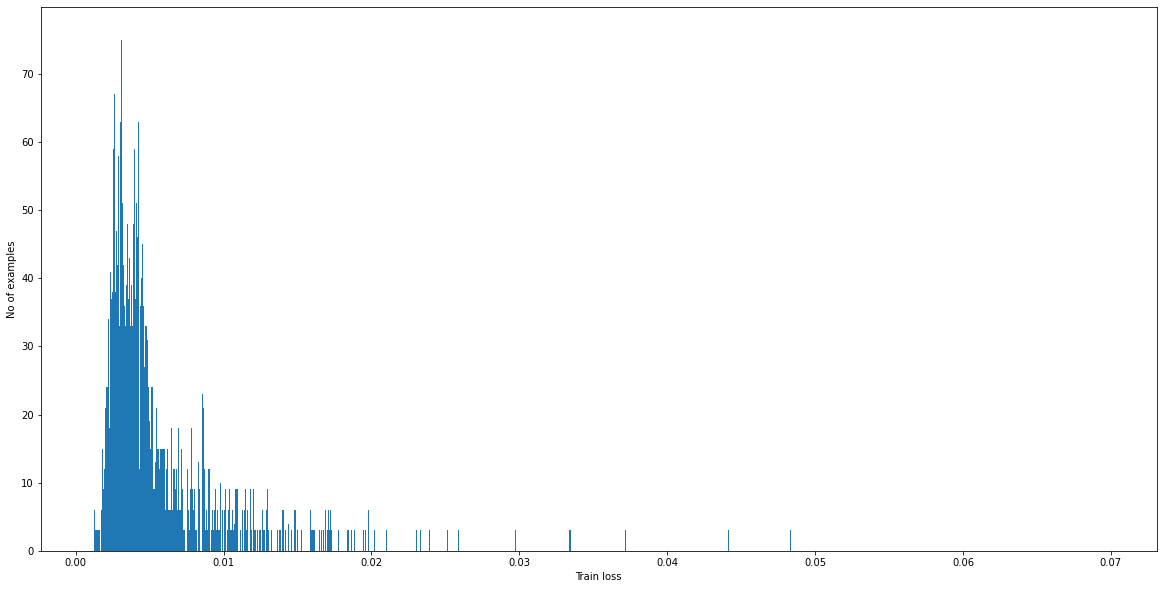

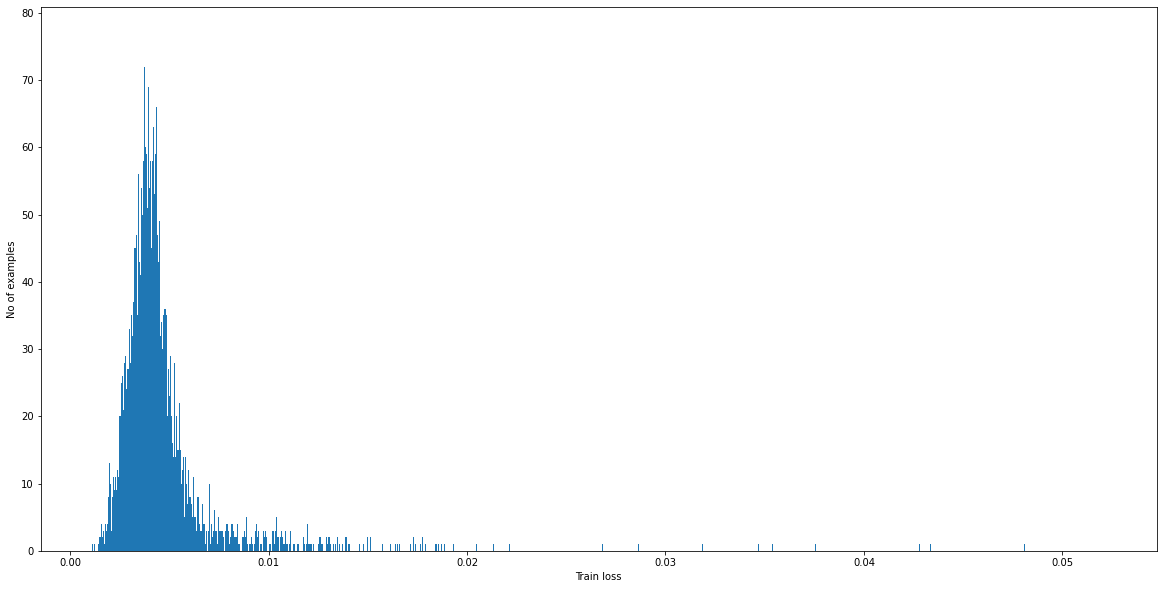

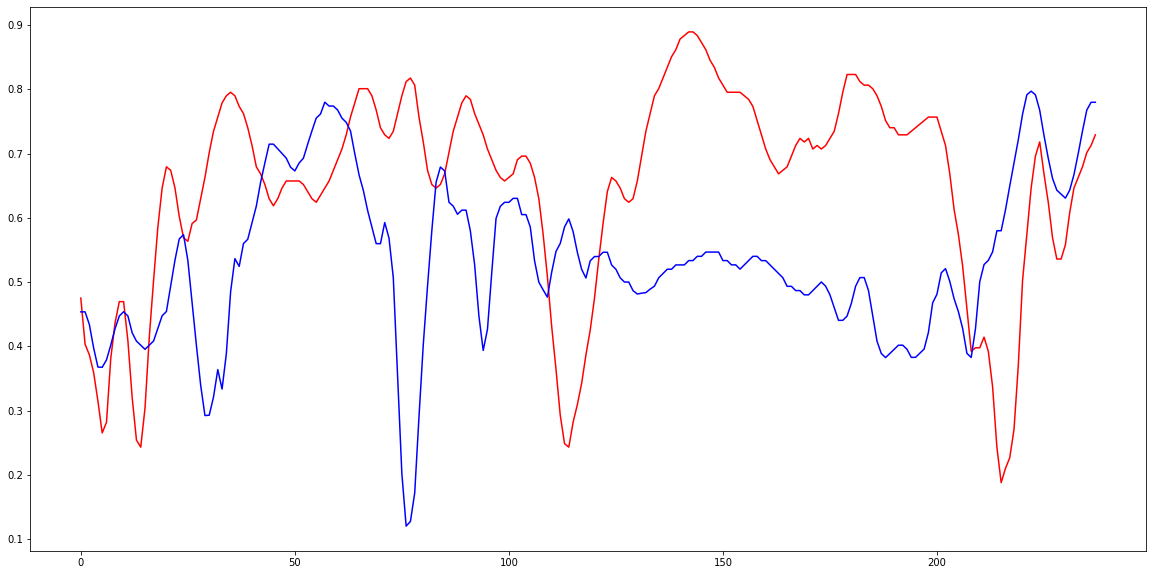

In [ ]:
predictions_asc = model.predict(asc_data)
predictions_walk = model.predict(walk_data)
train_loss_asc = tf.keras.losses.mae(predictions_asc, asc_data)
train_loss_walk = tf.keras.losses.mae(predictions_walk, walk_data)

plt.hist(train_loss_asc, bins=5000)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

plt.hist(train_loss_walk, bins=5000)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

plt.plot(range(238),des_data[238:238*2,0],color='r')
plt.plot(range(238),predictions_walk[238:238*2,0],color='b')
plt.show()